# Urban Simulation
## Assignment Preparation

This notebook has been desgined to work through the assignment for CASA0002 module.

* Part 1: London's Underground Resilience
* 1.0 Topollogical Network
* 1.1 Centrality Measures

Select 3 centrality measures to characterise nodes, aiming at identifying the most important nodes in the underground network.
* Define each centrality measure (and add their equation) and contextualise with the underground network.
* State how these measure will allow you to find stations that are most crucial for the functioning of the underground
* Give the results in a table for the first 10 ranked nodes for each of the 3 applied measures.

Centrality measures selected
1. **Degree centrality** - measures the no. of edges it has
2. **Closeness centrality** - indicates how close a node is to all other nodes in the network
3. **Betweeness centrality** - measures how important a node is to the shortest paths through a network

### Reading in the data

In [1]:
import pandas as pd

# Read in the edgelist file from csv
ldn_underground = pd.read_csv("london_flows.csv")

# Print data (first five rows)
ldn_underground.head()

station_origin station_destination  flows  population   jobs     distance
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097
1     Abbey Road             Beckton      1         599    442  8510.121774
2     Abbey Road           Blackwall      3         599    665  3775.448872
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220
4     Abbey Road        Canning Town     37         599  15428  2228.923167

/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **

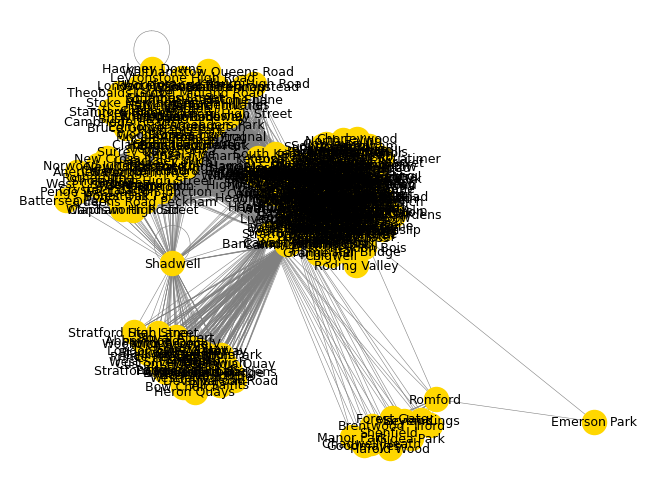

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graph object
tube_stations = nx.from_pandas_edgelist(ldn_underground, 'station_origin', 'station_destination', 'distance')

# Plot graph
nx.draw(tube_stations,
        with_labels = True,
        node_color='gold',
        font_size=9,
        font_color='black',
        edge_color='gray',
        width=0.4)

In [3]:
print(tube_stations)

Graph with 399 nodes and 31718 edges


In [4]:
list(tube_stations.edges(data = True))[0:10]

[('Abbey Road', 'Bank and Monument', {'distance': 8131.525096864179}),
 ('Abbey Road', 'Beckton', {'distance': 8510.121773987867}),
 ('Abbey Road', 'Blackwall', {'distance': 3775.448872076439}),
 ('Abbey Road', 'Canary Wharf', {'distance': 5086.514219663481}),
 ('Abbey Road', 'Canning Town', {'distance': 2228.9231673286404}),
 ('Abbey Road', 'Crossharbour', {'distance': 6686.475559947157}),
 ('Abbey Road', 'Custom House', {'distance': 3824.855629892705}),
 ('Abbey Road', 'Cutty Sark', {'distance': 8503.898908948277}),
 ('Abbey Road', 'Cyprus', {'distance': 6532.0996175362725}),
 ('Abbey Road', 'Devons Road', {'distance': 3958.324170837429})]

In [5]:
list(tube_stations.nodes(data = True))[0:10]

[('Abbey Road', {}),
 ('Bank and Monument', {}),
 ('Beckton', {}),
 ('Blackwall', {}),
 ('Canary Wharf', {}),
 ('Canning Town', {}),
 ('Crossharbour', {}),
 ('Custom House', {}),
 ('Cutty Sark', {}),
 ('Cyprus', {})]

### 1. Degree Centrality

In [6]:
#Let us compute the degree centrality
deg_stations=nx.degree(tube_stations)

# Print degree as list: 
list(deg_stations)[0:10]

[('Abbey Road', 34),
 ('Bank and Monument', 305),
 ('Beckton', 43),
 ('Blackwall', 40),
 ('Canary Wharf', 307),
 ('Canning Town', 304),
 ('Crossharbour', 42),
 ('Custom House', 44),
 ('Cutty Sark', 44),
 ('Cyprus', 42)]

In [7]:
dict(deg_stations)

{'Abbey Road': 34,
 'Bank and Monument': 305,
 'Beckton': 43,
 'Blackwall': 40,
 'Canary Wharf': 307,
 'Canning Town': 304,
 'Crossharbour': 42,
 'Custom House': 44,
 'Cutty Sark': 44,
 'Cyprus': 42,
 'Devons Road': 41,
 'East India': 44,
 'Island Gardens': 37,
 'King George V': 37,
 'Langdon Park': 41,
 'Lewisham': 42,
 'Limehouse': 46,
 'London City Airport': 41,
 'Pontoon Dock': 42,
 'Poplar': 42,
 'Prince Regent': 44,
 'Royal Albert': 39,
 'Shadwell': 98,
 'South Quay': 44,
 'Star Lane': 37,
 'Stratford': 367,
 'Stratford High Street': 29,
 'Stratford International': 42,
 'West Ham': 291,
 'West Silvertown': 42,
 'Westferry': 44,
 'Woolwich Arsenal': 40,
 'Acton Central': 64,
 'Barking': 296,
 'Blackhorse Road': 244,
 'Brondesbury': 68,
 'Brondesbury Park': 61,
 'Bushey': 39,
 'Caledonian Road & Barnsbury': 67,
 'Camden Road': 91,
 'Canada Water': 307,
 'Canonbury': 67,
 'Carpenders Park': 45,
 'Crouch Hill': 42,
 'Dalston Kingsland': 68,
 'Denmark Hill': 51,
 'Edmonton Green': 57,

In [8]:
# Let us add the degree data as attribute to the nodes in the graph
# Data needs to be in the form of dictionary, in which nodes are the keys and attibutes are the values.
nx.set_node_attributes(tube_stations,dict(deg_stations),'degree')

# To check nodes attributes
list(tube_stations.nodes(data=True))[0:10]

[('Abbey Road', {'degree': 34}),
 ('Bank and Monument', {'degree': 305}),
 ('Beckton', {'degree': 43}),
 ('Blackwall', {'degree': 40}),
 ('Canary Wharf', {'degree': 307}),
 ('Canning Town', {'degree': 304}),
 ('Crossharbour', {'degree': 42}),
 ('Custom House', {'degree': 44}),
 ('Cutty Sark', {'degree': 44}),
 ('Cyprus', {'degree': 42})]

In [9]:
# Return degree attributes that we will use for the colour of nodes 
deg_color=[(node['degree']) for i, node in tube_stations.nodes(data=True)]

print(deg_color)

[34, 305, 43, 40, 307, 304, 42, 44, 44, 42, 41, 44, 37, 37, 41, 42, 46, 41, 42, 42, 44, 39, 98, 44, 37, 367, 29, 42, 291, 42, 44, 40, 64, 296, 244, 68, 61, 39, 67, 91, 307, 67, 45, 42, 68, 51, 57, 266, 67, 85, 282, 72, 80, 59, 90, 206, 45, 207, 35, 36, 58, 321, 81, 60, 168, 80, 84, 116, 277, 28, 42, 37, 38, 51, 159, 253, 305, 54, 58, 28, 121, 34, 197, 62, 51, 42, 44, 234, 271, 52, 311, 265, 36, 233, 245, 257, 170, 159, 263, 236, 205, 213, 264, 226, 264, 162, 242, 176, 200, 196, 254, 283, 265, 265, 233, 188, 215, 219, 264, 226, 167, 243, 260, 253, 177, 117, 207, 259, 261, 198, 113, 238, 210, 220, 157, 205, 207, 262, 130, 188, 218, 203, 246, 198, 262, 211, 216, 247, 233, 179, 175, 261, 265, 265, 229, 264, 204, 239, 262, 257, 229, 262, 196, 172, 225, 237, 265, 197, 264, 190, 239, 199, 200, 216, 233, 201, 265, 209, 158, 265, 218, 252, 218, 222, 203, 252, 125, 231, 243, 223, 265, 202, 264, 242, 252, 207, 215, 264, 235, 229, 306, 267, 236, 235, 255, 248, 262, 140, 262, 218, 220, 216, 216, 12

In [10]:
# For setting node size based on degree values

deg_size=[(float(node['degree'])/max(deg_color)*1000) for i, node in tube_stations.nodes(data=True)]

print(deg_size)

[92.64305177111716, 831.0626702997274, 117.16621253405994, 108.99182561307902, 836.5122615803815, 828.3378746594005, 114.44141689373296, 119.89100817438691, 119.89100817438691, 114.44141689373296, 111.71662125340599, 119.89100817438691, 100.8174386920981, 100.8174386920981, 111.71662125340599, 114.44141689373296, 125.34059945504086, 111.71662125340599, 114.44141689373296, 114.44141689373296, 119.89100817438691, 106.26702997275204, 267.0299727520436, 119.89100817438691, 100.8174386920981, 1000.0, 79.01907356948229, 114.44141689373296, 792.9155313351499, 114.44141689373296, 119.89100817438691, 108.99182561307902, 174.38692098092642, 806.5395095367847, 664.850136239782, 185.28610354223432, 166.2125340599455, 106.26702997275204, 182.56130790190736, 247.95640326975476, 836.5122615803815, 182.56130790190736, 122.6158038147139, 114.44141689373296, 185.28610354223432, 138.96457765667574, 155.3133514986376, 724.7956403269756, 182.56130790190736, 231.60762942779292, 768.3923705722071, 196.185286

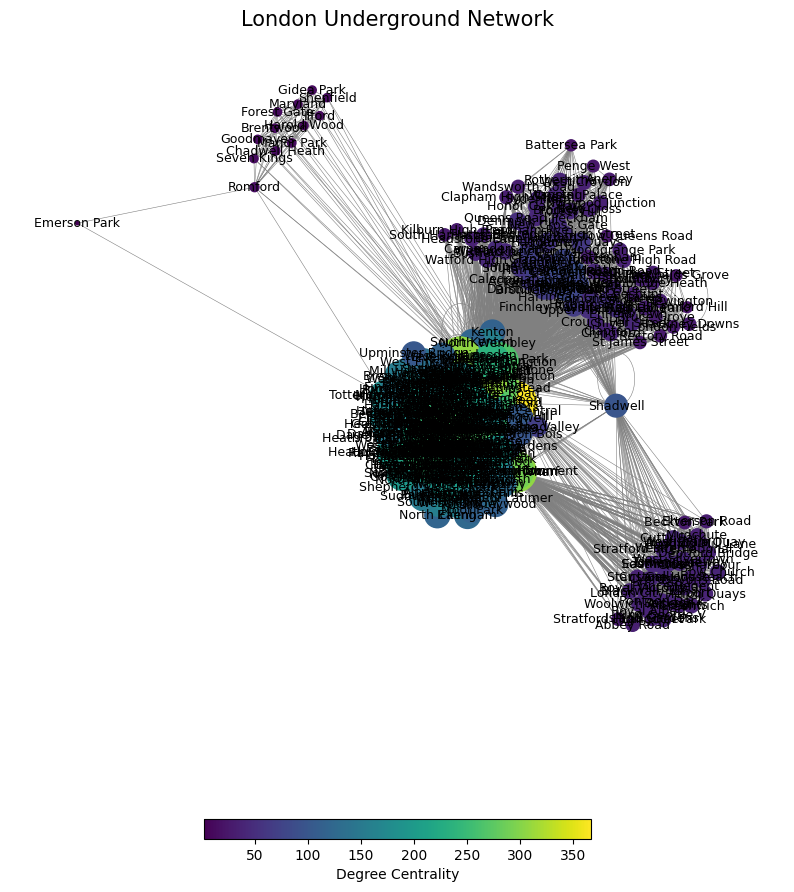

In [11]:
#we can plot the graph using the measure of degree:

fig, ax = plt.subplots(figsize=(10,12))

pos=nx.spring_layout(tube_stations)
nx.draw_networkx_labels(tube_stations, pos,font_size=9,
        font_color='black')
nx.draw_networkx_edges(tube_stations, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(tube_stations,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London Underground Network",fontsize=15)
plt.show()

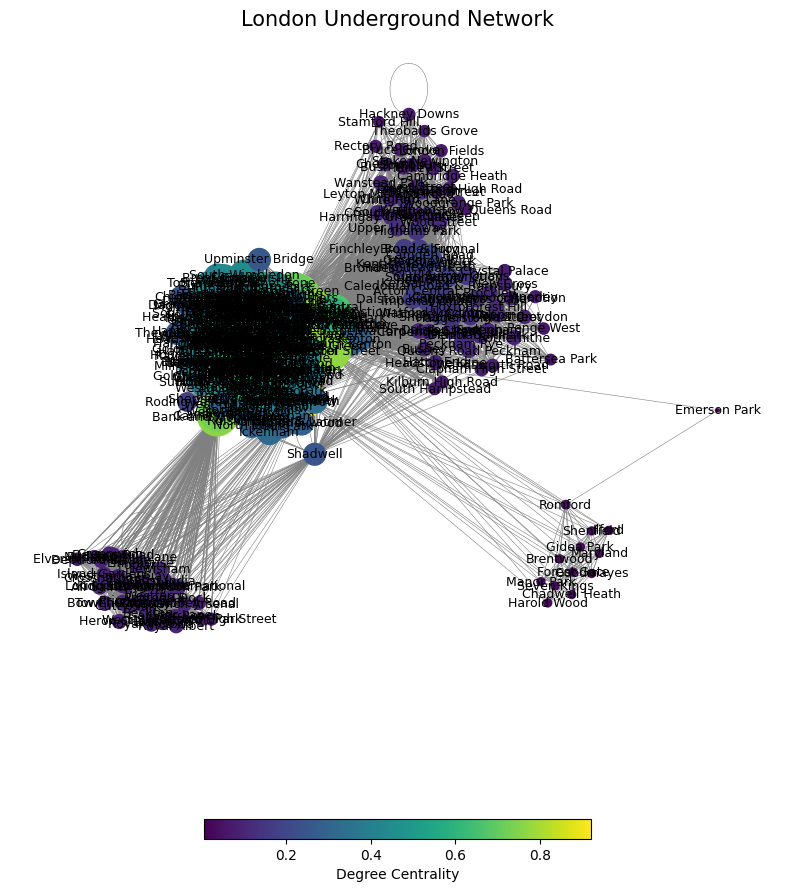

In [12]:
#  We can calculate the normalised version of degree centrality using networkx function:
deg_tube_norm =nx.degree_centrality(tube_stations)


nx.set_node_attributes(tube_stations,dict(deg_tube_norm),'degree_norm')

deg_color_norm=[(node['degree_norm']) for i, node in tube_stations.nodes(data=True)]
deg_size_norm=[(node['degree_norm']*1000) for i, node in tube_stations.nodes(data=True)]


fig, ax = plt.subplots(figsize=(10,12))


pos=nx.spring_layout(tube_stations)
nx.draw_networkx_edges(tube_stations, pos,edge_color='gray', 
        width=0.4)
nx.draw_networkx_labels(tube_stations, pos,font_size=9,
        font_color='black')
nod=nx.draw_networkx_nodes(tube_stations,
        pos = pos,
        node_color= deg_color_norm,
        node_size= deg_size_norm)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London Underground Network",fontsize=15)
plt.show()

#Note that values now go from 0 to 1

In [13]:
#  We can calculate the degree centrality using networkx function:
deg_stations =nx.degree_centrality(tube_stations)
nx.set_node_attributes(tube_stations,dict(deg_stations),'degree')

In [14]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=tube_stations.nodes())
#df['distance'] = pd.Series(nx.get_node_attributes(tube_stations2, 'distance'))
df['degree'] = pd.Series(nx.get_node_attributes(tube_stations, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

degree
Stratford             0.922111
Highbury & Islington  0.806533
Whitechapel           0.781407
West Brompton         0.776382
Canada Water          0.771357
Canary Wharf          0.771357
Liverpool Street      0.768844
Bank and Monument     0.766332
Richmond              0.766332
Canning Town          0.763819

### 2. Closeness Centrality

#### Topological Closeness Centrality

In [15]:
#topological closeness
clos_top_tube=nx.closeness_centrality(tube_stations)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(tube_stations,clos_top_tube,'closeness_top')

pd.DataFrame.from_dict(clos_top_tube,columns=['closeness_top'],orient='index')[0:10]

closeness_top
Abbey Road              0.515544
Bank and Monument       0.810591
Beckton                 0.521625
Blackwall               0.519582
Canary Wharf            0.810591
Canning Town            0.808943
Crossharbour            0.520942
Custom House            0.522310
Cutty Sark              0.522310
Cyprus                  0.520942

/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **

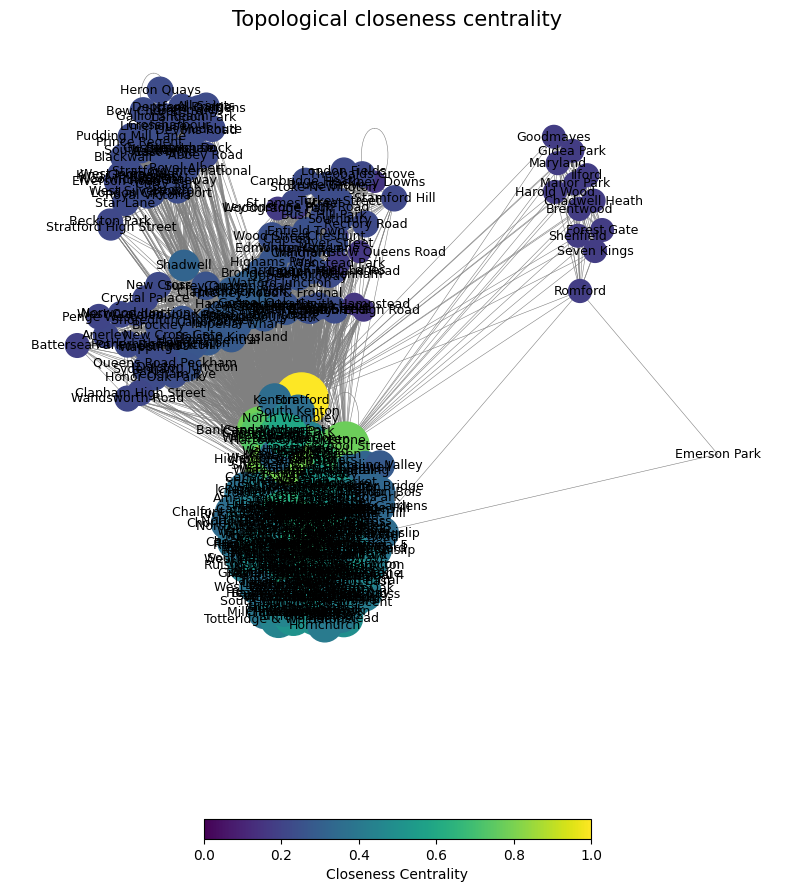

In [16]:
# Set color and size
# Closeness values
clos_val=[(i[1]['closeness_top']) for i in tube_stations.nodes(data=True)]


normalised_clos_top_tube=[((i[1]['closeness_top']-min(clos_val))/(max(clos_val)-min(clos_val))) for i in tube_stations.nodes(data=True)]
clos_top_tube_size=[((i[1]['closeness_top']-min(clos_val))/(max(clos_val)-min(clos_val))*1500) for i in tube_stations.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(10,12))

pos=nx.spring_layout(tube_stations)
nx.draw_networkx_edges(tube_stations, pos,edge_color='gray', 
        width=0.4)
nx.draw_networkx_labels(tube_stations, pos,font_size=9,
        font_color='black')
nod=nx.draw_networkx_nodes(tube_stations,
        pos = pos,
        node_color= normalised_clos_top_tube,
        node_size=clos_top_tube_size )

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Topological closeness centrality",fontsize=15)
plt.show()

In [17]:
#topological closeness centrality
clos_t=nx.closeness_centrality(tube_stations)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_stations,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index= tube_stations.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(tube_stations, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(tube_stations, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

closeness_t
Stratford                0.927739
Highbury & Islington     0.836134
Whitechapel              0.820619
West Brompton            0.817248
Canada Water             0.813906
Richmond                 0.810591
Canary Wharf             0.810591
Bank and Monument        0.810591
Liverpool Street         0.808943
Canning Town             0.808943

### 3. Betweenness Centrality

In [18]:
#Topological betweenness centrality for the network 
bet_tube_top=nx.betweenness_centrality(tube_stations,normalized=False)
pd.DataFrame.from_dict(bet_tube_top,columns=['betweenness_top'],orient='index')[0:10]

betweenness_top
Abbey Road                0.628393
Bank and Monument      2208.627931
Beckton                   2.630688
Blackwall                 1.732149
Canary Wharf           2208.627931
Canning Town           2192.848026
Crossharbour              1.668217
Custom House              2.852333
Cutty Sark                2.852333
Cyprus                    2.603995

/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **

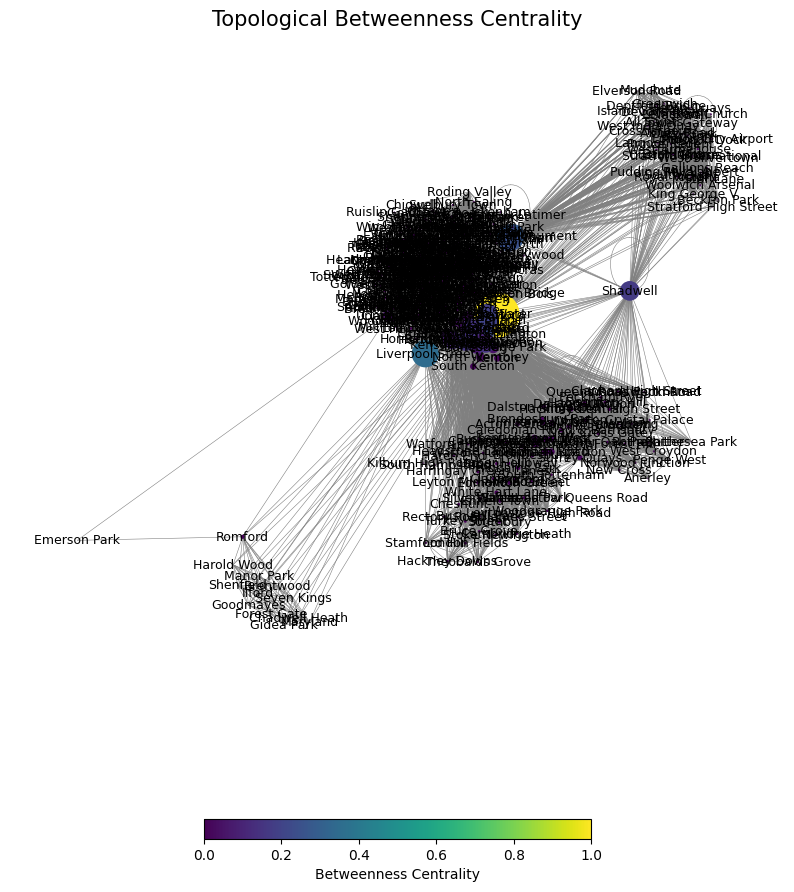

In [19]:
# Let us add the betweenness centrality as attribute to the nodes in the graph
nx.set_node_attributes(tube_stations,bet_tube_top,'betweenness_top')

betweenness_top_values=[(i[1]['betweenness_top']) for i in tube_stations.nodes(data=True)]


# Lets set color and size of nodes according to betweenness values
bet_color_top=[(i[1]['betweenness_top']/max(betweenness_top_values)) for i in tube_stations.nodes(data=True)]
bet_size_top=[(i[1]['betweenness_top']/max(betweenness_top_values)*1000) for i in tube_stations.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(10,12))

pos=nx.spring_layout(tube_stations)
nx.draw_networkx_edges(tube_stations, pos,edge_color='gray', 
        width=0.4)
nx.draw_networkx_labels(tube_stations, pos,font_size=9,
        font_color='black')
nod=nx.draw_networkx_nodes(tube_stations,
        pos = pos,
        node_color= bet_color_top,
        node_size= bet_size_top)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Topological Betweenness Centrality",fontsize=15)
plt.show()

In [20]:
# Print node list with attributes
list(tube_stations.nodes(data = True))[0:5]

[('Abbey Road',
  {'degree': 0.08542713567839195,
   'degree_norm': 0.08542713567839195,
   'closeness_top': 0.5155440414507773,
   'closeness_t': 0.5155440414507773,
   'betweenness_top': 0.6283928089661619}),
 ('Bank and Monument',
  {'degree': 0.7663316582914573,
   'degree_norm': 0.7663316582914573,
   'closeness_top': 0.8105906313645621,
   'closeness_t': 0.8105906313645621,
   'betweenness_top': 2208.6279307564705}),
 ('Beckton',
  {'degree': 0.10804020100502512,
   'degree_norm': 0.10804020100502512,
   'closeness_top': 0.5216251638269986,
   'closeness_t': 0.5216251638269986,
   'betweenness_top': 2.630687538748441}),
 ('Blackwall',
  {'degree': 0.10050251256281408,
   'degree_norm': 0.10050251256281408,
   'closeness_top': 0.5195822454308094,
   'closeness_t': 0.5195822454308094,
   'betweenness_top': 1.732148557094933}),
 ('Canary Wharf',
  {'degree': 0.771356783919598,
   'degree_norm': 0.771356783919598,
   'closeness_top': 0.8105906313645621,
   'closeness_t': 0.8105906313

In [21]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(tube_stations, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_stations,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=tube_stations.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(tube_stations2, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(tube_stations, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

betweenness_t
Stratford               7785.967073
Liverpool Street        2710.377160
Canary Wharf            2208.627931
Bank and Monument       2208.627931
Canning Town            2192.848026
West Ham                1939.641831
Highbury & Islington    1818.904025
Whitechapel             1554.965946
Canada Water            1413.977663
Shadwell                1348.588902

/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **

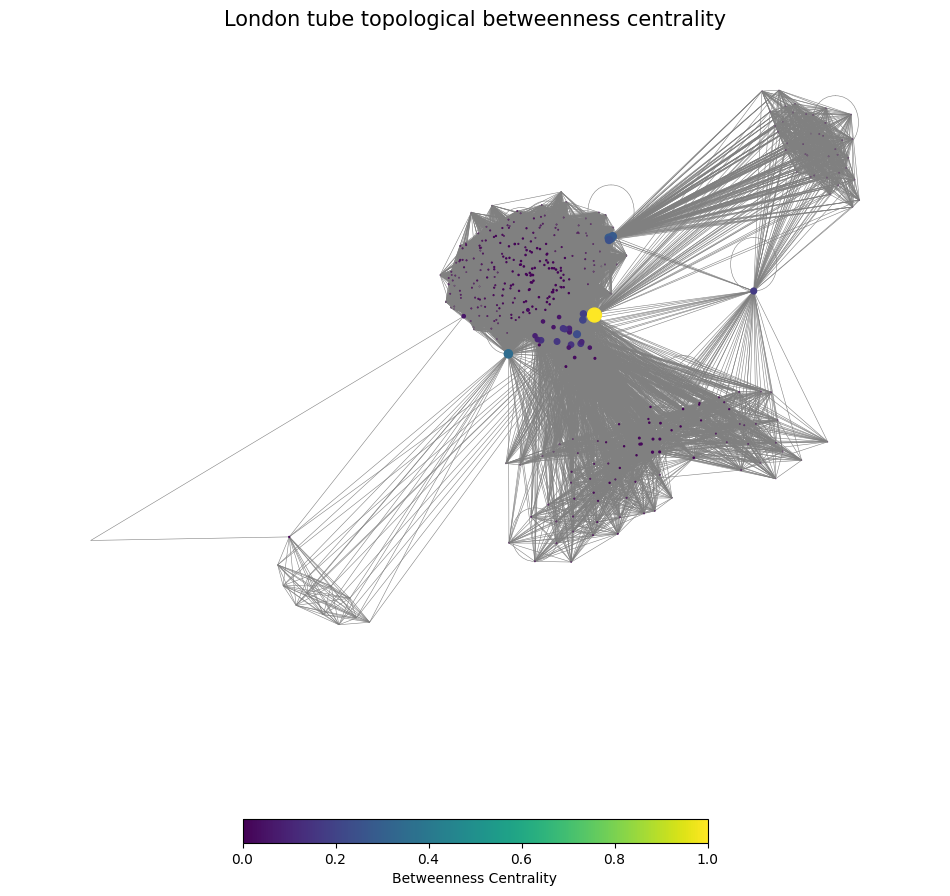

In [22]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in tube_stations.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in tube_stations.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in tube_stations.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(tube_stations, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(tube_stations, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological betweenness centrality",fontsize=15)
plt.show()

#### 1.2 Impact Measures
* Degree Distribution
* Clustering Coefficient

In [23]:
# we can create the network using networkx from_pandas_edgelist
G = nx.from_pandas_edgelist(ldn_underground, 'station_origin','station_destination')

# let's also plot some basic information about the network
# print(nx.info(G))
print(f'Number of connected components:{nx.number_connected_components(G)}')
print(f'Highest degree node: {sorted(G.degree(), key=lambda pair: pair[1])[-1]}')

Number of connected components:1
Highest degree node: ('Stratford', 367)


In [24]:
# we will get the position of the nodes once so we don't need to recalculate every time we plot
pos = nx.spring_layout(G)

# more layouts at https://networkx.org/documentation/stable/reference/drawing.html

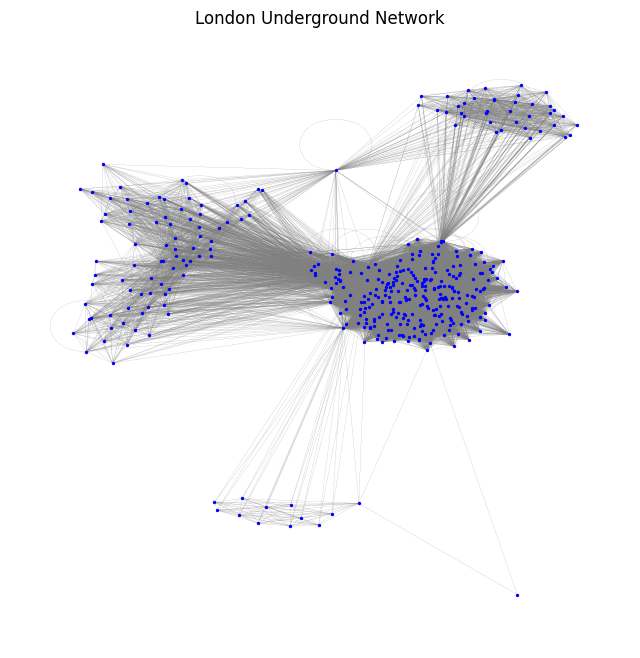

In [25]:
fig, ax = plt.subplots(figsize=(8,8))
nx.draw_networkx_edges(G,
                       pos=pos,
                       edge_color='gray',
                       width=0.1,
                       ax=ax
                      )
nx.draw_networkx_nodes(G, 
                       pos=pos,
                       node_color='blue',
                       node_size=2,
                       ax=ax
                      )
plt.axis("off")
plt.title('London Underground Network', fontsize=12)
plt.show()

In [26]:
# we can see in the plot that the graph has more then one component
# let's subset this graph to the largest connected component
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
Gsub = G.subgraph(Gcc[0])

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(G.nodes)) * 100

lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
# print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')
print(f"Highest degree nodes: \n \t" \
        f"{lb.join(f'{hero[0]}: {hero[1]}' for hero in sorted(Gsub.degree(), key=lambda pair: pair[1], reverse=True)[0:5])}")

Largest Connected Compenent:100.00%
Number of connected components:1
Highest degree nodes: 
 	Stratford: 367
 	Highbury & Islington: 321
 	Whitechapel: 311
 	West Brompton: 309
 	Canary Wharf: 307


In [27]:
import matplotlib.pyplot as plt
import numpy as np

/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/1734937322.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  ax2.loglog(np.arange(degree_prob.shape[0]),degree_prob,'b.', color='blue', markersize=2)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)

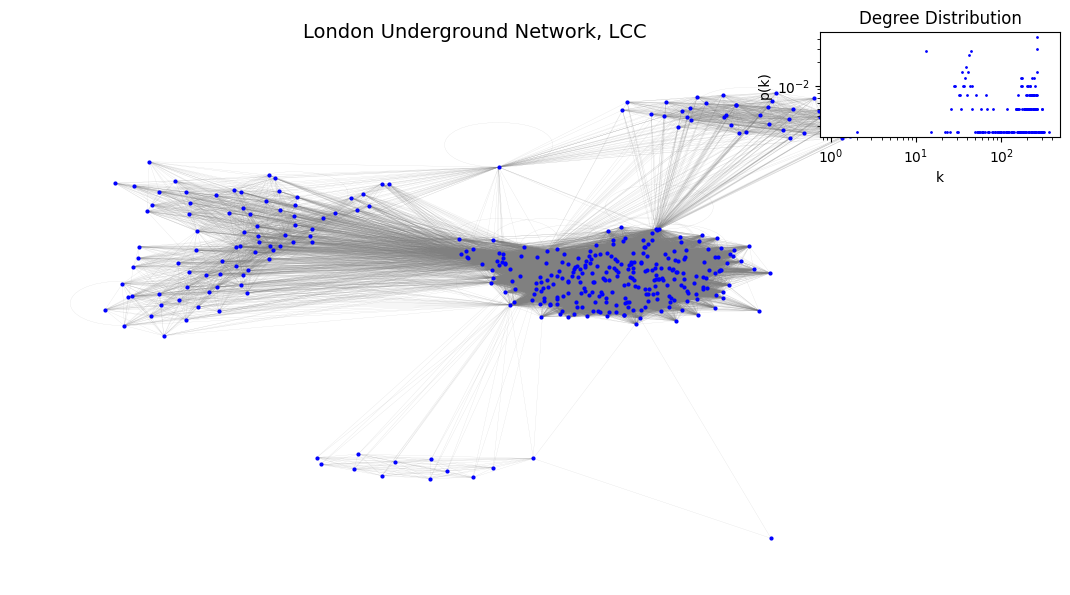

In [28]:
fig, ax = plt.subplots(figsize=(12,7))

# plot largest connected components
nx.draw_networkx_edges(Gsub,
                       pos=pos,
                       edge_color='gray',
                       width=0.1,
                       alpha=0.5,
                       ax=ax
                      )
nx.draw_networkx_nodes(Gsub, 
                       pos=pos,
                       node_color='blue',
                       node_size=4,
                       ax=ax
                      )
ax.axis('off')
ax.set_title('London Underground Network, LCC', fontsize=14)

# plot the degree distribution
# degree distribution will be covered next lecture 

degree_hist = nx.degree_histogram(G) 
degree_hist = np.array(degree_hist, dtype=float)
degree_prob = degree_hist/G.number_of_nodes()

ax2 = fig.add_axes([0.8, 0.75, 0.2, 0.15])
ax2.loglog(np.arange(degree_prob.shape[0]),degree_prob,'b.', color='blue', markersize=2)
ax2.set_xlabel('k')
ax2.set_ylabel('p(k)')
ax2.set_title('Degree Distribution')


plt.show()

In [29]:
# let's measure the clustering coefficient
c = nx.clustering(Gsub)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
avg clustering coefficient: 0.8461409018249705


In [30]:
from networkx.algorithms.community import greedy_modularity_communities
import itertools

# let's start with greedy modularity
communities_fg = greedy_modularity_communities(Gsub)

print(f'number of communities: {len(communities_fg)}')

number of communities: 3


IndexError: list index out of range

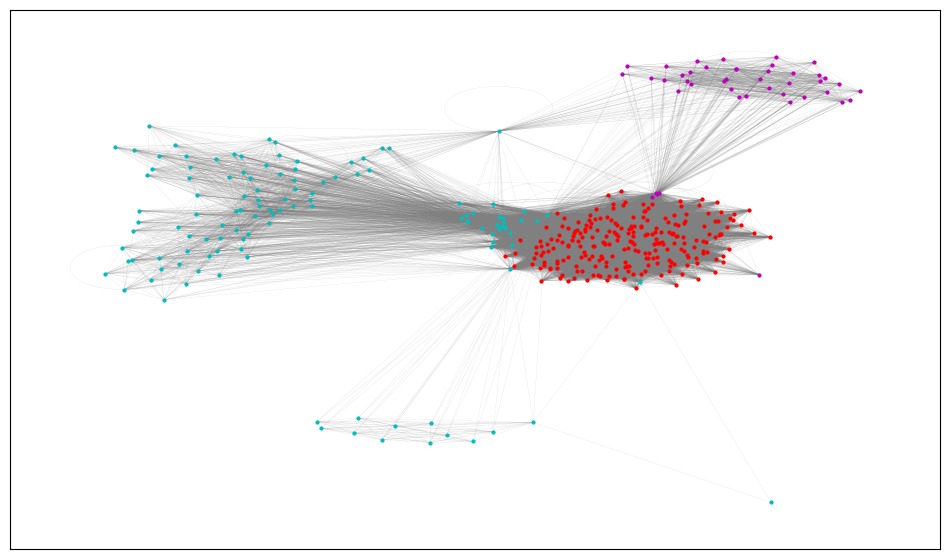

In [31]:
# we can sort this communities to plot only the largest communities 
communities_fg = sorted(communities_fg)

fig, ax = plt.subplots(figsize=(12,7))

# plot the entire graph with gray nodes
nx.draw_networkx_nodes(Gsub, 
                       pos=pos,
                       node_color='grey',
                       node_size=2,
                       ax=ax, 
                      )

nx.draw_networkx_edges(Gsub,
                       pos=pos,
                       edge_color='gray',
                       width=0.1,
                       alpha=0.5,
                       ax=ax
                      )

# set the colors we will be using for each community
cls = ['r', 'c', 'm', 'y', 'b']
i=0
while i<5:
    nx.draw_networkx_nodes(Gsub, 
                           pos=pos,
                           node_color=cls[i],
                           node_size=4,
                           ax=ax, 
                           nodelist= list(communities_fg[i])
                          )
    i+=1
    
plt.axis('off')
plt.title('Fast-Greedy Community Detection on London Underground Network, LCC', fontsize=14)

plt.show()

## 1.3 Node Removal
In this section, nodes will be removed using the following two strategies for each centrality measure.

#### Strategy A: Non-sequential removal
* Using the table created in 1.1 remove 1 node at a time following the rank (from most to least important)
* After each removal, evaluate the impact of the removal using 2 measures in 1.2 and proceed until you removed 10 nodes

#### Strategy B: Sequential removal
* Remove the highest ranked node and evaluate the impact using the 2 measures
* After removal, re-compute the centrality measure.
* Remove the highest ranked node in the new network and evaluate the impact.
* Continue until removing at least 10 nodes.

In [32]:
tube_DC = tube_stations # DC abbreviation for Degree Centrality

In [33]:
tube_CC = tube_stations # CC abbreviation for Closeness Centrality

In [34]:
tube_BC = tube_stations # BC abbreviation for Betweenness Centrality

In [35]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=tube_DC.nodes())
#df['distance'] = pd.Series(nx.get_node_attributes(tube_stations2, 'distance'))
df['degree'] = pd.Series(nx.get_node_attributes(tube_DC, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:11]

degree
Stratford             0.922111
Highbury & Islington  0.806533
Whitechapel           0.781407
West Brompton         0.776382
Canada Water          0.771357
Canary Wharf          0.771357
Liverpool Street      0.768844
Bank and Monument     0.766332
Richmond              0.766332
Canning Town          0.763819
Shepherd's Bush       0.746231

In [36]:
list(tube_DC.nodes(data = True))[0:5]

[('Abbey Road',
  {'degree': 0.08542713567839195,
   'degree_norm': 0.08542713567839195,
   'closeness_top': 0.5155440414507773,
   'closeness_t': 0.5155440414507773,
   'betweenness_top': 0.6283928089661619,
   'betweenness_t': 0.6283928089661619}),
 ('Bank and Monument',
  {'degree': 0.7663316582914573,
   'degree_norm': 0.7663316582914573,
   'closeness_top': 0.8105906313645621,
   'closeness_t': 0.8105906313645621,
   'betweenness_top': 2208.6279307564705,
   'betweenness_t': 2208.6279307564705}),
 ('Beckton',
  {'degree': 0.10804020100502512,
   'degree_norm': 0.10804020100502512,
   'closeness_top': 0.5216251638269986,
   'closeness_t': 0.5216251638269986,
   'betweenness_top': 2.630687538748441,
   'betweenness_t': 2.630687538748441}),
 ('Blackwall',
  {'degree': 0.10050251256281408,
   'degree_norm': 0.10050251256281408,
   'closeness_top': 0.5195822454308094,
   'closeness_t': 0.5195822454308094,
   'betweenness_top': 1.732148557094933,
   'betweenness_t': 1.732148557094933}),

In [37]:
#topological closeness centrality
clos_t=nx.closeness_centrality(tube_CC)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_CC,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index= tube_CC.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(tube_stations2, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(tube_CC, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

closeness_t
Stratford                0.927739
Highbury & Islington     0.836134
Whitechapel              0.820619
West Brompton            0.817248
Canada Water             0.813906
Richmond                 0.810591
Canary Wharf             0.810591
Bank and Monument        0.810591
Liverpool Street         0.808943
Canning Town             0.808943

In [38]:
tube_DC.remove_node('Stratford')

In [39]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=tube_DC.nodes())
#df['distance'] = pd.Series(nx.get_node_attributes(tube_stations2, 'distance'))
df['degree'] = pd.Series(nx.get_node_attributes(tube_DC, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:11]

degree
Highbury & Islington  0.806533
Whitechapel           0.781407
West Brompton         0.776382
Canada Water          0.771357
Canary Wharf          0.771357
Liverpool Street      0.768844
Richmond              0.766332
Bank and Monument     0.766332
Canning Town          0.763819
Shepherd's Bush       0.746231
Barking               0.743719

In [40]:
list(tube_CC.nodes(data = True))[0:5]

[('Abbey Road',
  {'degree': 0.08542713567839195,
   'degree_norm': 0.08542713567839195,
   'closeness_top': 0.5155440414507773,
   'closeness_t': 0.5155440414507773,
   'betweenness_top': 0.6283928089661619,
   'betweenness_t': 0.6283928089661619}),
 ('Bank and Monument',
  {'degree': 0.7663316582914573,
   'degree_norm': 0.7663316582914573,
   'closeness_top': 0.8105906313645621,
   'closeness_t': 0.8105906313645621,
   'betweenness_top': 2208.6279307564705,
   'betweenness_t': 2208.6279307564705}),
 ('Beckton',
  {'degree': 0.10804020100502512,
   'degree_norm': 0.10804020100502512,
   'closeness_top': 0.5216251638269986,
   'closeness_t': 0.5216251638269986,
   'betweenness_top': 2.630687538748441,
   'betweenness_t': 2.630687538748441}),
 ('Blackwall',
  {'degree': 0.10050251256281408,
   'degree_norm': 0.10050251256281408,
   'closeness_top': 0.5195822454308094,
   'closeness_t': 0.5195822454308094,
   'betweenness_top': 1.732148557094933,
   'betweenness_t': 1.732148557094933}),

In [41]:
#topological closeness centrality
clos_t=nx.closeness_centrality(tube_CC)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_CC,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index= tube_CC.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(tube_stations2, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(tube_CC, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

closeness_t
Highbury & Islington     0.835789
Whitechapel              0.820248
West Brompton            0.816872
Canada Water             0.813525
Richmond                 0.810204
Canary Wharf             0.810204
Bank and Monument        0.810204
Liverpool Street         0.808554
Canning Town             0.808554
Barking                  0.795591

In [43]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(tube_BC, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_BC,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=tube_BC.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(tube_stations2, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(tube_BC, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

betweenness_t
Liverpool Street        5535.077442
Canary Wharf            3119.379194
Bank and Monument       3119.379194
Canning Town            3093.900145
West Ham                2730.579155
Shadwell                2091.271278
Highbury & Islington    2010.739275
Whitechapel             1643.551113
Canada Water            1467.702729
Richmond                1423.656977

In [44]:
# let's measure the clustering coefficient
c = nx.clustering(tube_DC)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
avg clustering coefficient: 0.8452471626168775


In [51]:
# let's measure the clustering coefficient
c1 = nx.clustering(tube_CC)
print(type(c1))

# we can sort the dictionary by the clustering coefficient
c1 = sorted(c1.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c1_avg = sum([i[1] for i in c1]) / len(c1)
print(f'avg clustering coefficient: {c1_avg}')

<class 'dict'>
[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
avg clustering coefficient: 0.8452471626168775


In [46]:
# let's measure the clustering coefficient
c = nx.clustering(tube_BC)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
avg clustering coefficient: 0.8452471626168775


In [48]:
# we can see in the plot that the graph has more then one component
# let's subset this graph to the largest connected component
Gcc = sorted(nx.connected_components(tube_DC), key=len, reverse=True)
Gsub = tube_DC.subgraph(Gcc[0])

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(tube_DC.nodes)) * 100

lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
# print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')
print(f"Highest degree nodes: \n \t" \
        f"{lb.join(f'{hero[0]}: {hero[1]}' for hero in sorted(Gsub.degree(), key=lambda pair: pair[1], reverse=True)[0:5])}")

Largest Connected Compenent:100.00%
Number of connected components:1
Highest degree nodes: 
 	Highbury & Islington: 320
 	Whitechapel: 310
 	West Brompton: 308
 	Canary Wharf: 306
 	Canada Water: 306


In [49]:
# we can see in the plot that the graph has more then one component
# let's subset this graph to the largest connected component
Gcc = sorted(nx.connected_components(tube_CC), key=len, reverse=True)
Gsub = tube_CC.subgraph(Gcc[0])

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(tube_CC.nodes)) * 100

lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
# print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')
print(f"Highest degree nodes: \n \t" \
        f"{lb.join(f'{hero[0]}: {hero[1]}' for hero in sorted(Gsub.degree(), key=lambda pair: pair[1], reverse=True)[0:5])}")

Largest Connected Compenent:100.00%
Number of connected components:1
Highest degree nodes: 
 	Highbury & Islington: 320
 	Whitechapel: 310
 	West Brompton: 308
 	Canary Wharf: 306
 	Canada Water: 306


In [52]:
tube_DC.remove_node('Highbury & Islington')

In [53]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=tube_DC.nodes())
#df['distance'] = pd.Series(nx.get_node_attributes(tube_stations2, 'distance'))
df['degree'] = pd.Series(nx.get_node_attributes(tube_DC, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:11]

degree
Whitechapel        0.781407
West Brompton      0.776382
Canary Wharf       0.771357
Canada Water       0.771357
Liverpool Street   0.768844
Richmond           0.766332
Bank and Monument  0.766332
Canning Town       0.763819
Shepherd's Bush    0.746231
Barking            0.743719
West Ham           0.731156

In [54]:
#topological closeness centrality
clos_t=nx.closeness_centrality(tube_CC)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_CC,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index= tube_CC.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(tube_stations2, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(tube_CC, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

closeness_t
Whitechapel           0.819876
West Brompton         0.816495
Canada Water          0.813142
Bank and Monument     0.809816
Canary Wharf          0.809816
Richmond              0.809816
Liverpool Street      0.808163
Canning Town          0.808163
Barking               0.795181
Shepherd's Bush       0.793587

In [55]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(tube_BC, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_BC,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=tube_BC.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(tube_stations2, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(tube_BC, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

betweenness_t
Liverpool Street     5609.406074
Canary Wharf         3113.797521
Bank and Monument    3113.797521
Canning Town         3088.095222
West Ham             2723.326641
Shadwell             2087.054671
Whitechapel          1929.977209
Canada Water         1737.166174
Richmond             1498.053554
West Brompton        1441.215397

In [56]:
tube_DC.remove_node('Whitechapel')

In [57]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=tube_DC.nodes())
#df['distance'] = pd.Series(nx.get_node_attributes(tube_stations2, 'distance'))
df['degree'] = pd.Series(nx.get_node_attributes(tube_DC, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:11]

degree
West Brompton      0.776382
Canary Wharf       0.771357
Canada Water       0.771357
Liverpool Street   0.768844
Richmond           0.766332
Bank and Monument  0.766332
Canning Town       0.763819
Shepherd's Bush    0.746231
Barking            0.743719
West Ham           0.731156
Bethnal Green      0.711055

In [58]:
#topological closeness centrality
clos_t=nx.closeness_centrality(tube_CC)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_CC,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index= tube_CC.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(tube_stations2, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(tube_CC, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

closeness_t
West Brompton         0.816116
Canada Water          0.812757
Canary Wharf          0.809426
Bank and Monument     0.809426
Richmond              0.809426
Liverpool Street      0.807771
Canning Town          0.807771
Barking               0.794769
Shepherd's Bush       0.793173
West Ham              0.786853

In [59]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(tube_BC, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_BC,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=tube_BC.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(tube_stations2, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(tube_BC, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

betweenness_t
Liverpool Street      5633.182451
Bank and Monument     3108.199109
Canary Wharf          3108.199109
Canning Town          3082.461578
West Ham              2717.314021
Canada Water          2420.487640
Shadwell              2085.053903
Richmond              1564.928691
West Brompton         1558.360219
Willesden Junction    1544.339171

In [60]:
tube_DC.remove_node('West Brompton')

In [61]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=tube_DC.nodes())
#df['distance'] = pd.Series(nx.get_node_attributes(tube_stations2, 'distance'))
df['degree'] = pd.Series(nx.get_node_attributes(tube_DC, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:11]

degree
Canada Water       0.771357
Canary Wharf       0.771357
Liverpool Street   0.768844
Bank and Monument  0.766332
Richmond           0.766332
Canning Town       0.763819
Shepherd's Bush    0.746231
Barking            0.743719
West Ham           0.731156
Bethnal Green      0.711055
Gunnersbury        0.708543

In [62]:
#topological closeness centrality
clos_t=nx.closeness_centrality(tube_CC)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_CC,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index= tube_CC.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(tube_stations2, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(tube_CC, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

closeness_t
Canada Water          0.812371
Canary Wharf          0.809035
Richmond              0.809035
Bank and Monument     0.809035
Liverpool Street      0.807377
Canning Town          0.807377
Barking               0.794355
Shepherd's Bush       0.792757
West Ham              0.786427
Bethnal Green         0.774067

In [63]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(tube_BC, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_BC,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=tube_BC.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(tube_stations2, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(tube_BC, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

betweenness_t
Liverpool Street      5672.811971
Canary Wharf          3102.084141
Bank and Monument     3102.084141
Canning Town          3076.123150
West Ham              2710.832501
Canada Water          2581.039092
Shadwell              2081.838644
Richmond              1697.120191
Willesden Junction    1647.653083
Gunnersbury           1573.741732

In [64]:
tube_DC.remove_node('Canada Water')

In [65]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=tube_DC.nodes())
#df['distance'] = pd.Series(nx.get_node_attributes(tube_stations2, 'distance'))
df['degree'] = pd.Series(nx.get_node_attributes(tube_DC, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

degree
Canary Wharf       0.771357
Liverpool Street   0.768844
Bank and Monument  0.766332
Richmond           0.766332
Canning Town       0.763819
Shepherd's Bush    0.746231
Barking            0.743719
West Ham           0.731156
Bethnal Green      0.711055
Gunnersbury        0.708543

In [66]:
#topological closeness centrality
clos_t=nx.closeness_centrality(tube_CC)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_CC,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index= tube_CC.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(tube_stations2, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(tube_CC, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

closeness_t
Canary Wharf          0.808642
Bank and Monument     0.808642
Richmond              0.808642
Canning Town          0.806982
Liverpool Street      0.806982
Barking               0.793939
Shepherd's Bush       0.792339
West Ham              0.786000
Bethnal Green         0.773622
Gunnersbury           0.772102

In [67]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(tube_BC, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_BC,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=tube_BC.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(tube_stations2, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(tube_BC, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

betweenness_t
Liverpool Street      5696.959064
Canary Wharf          3105.082557
Bank and Monument     3105.082557
Canning Town          3079.092411
West Ham              2713.028303
Shadwell              2135.632329
Willesden Junction    2053.212046
Shepherd's Bush       2003.890650
Richmond              1858.096554
Gunnersbury           1847.800098

In [68]:
tube_DC.remove_node('Canary Wharf')

In [69]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=tube_DC.nodes())
#df['distance'] = pd.Series(nx.get_node_attributes(tube_stations2, 'distance'))
df['degree'] = pd.Series(nx.get_node_attributes(tube_DC, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

degree
Liverpool Street   0.768844
Richmond           0.766332
Bank and Monument  0.766332
Canning Town       0.763819
Shepherd's Bush    0.746231
Barking            0.743719
West Ham           0.731156
Bethnal Green      0.711055
Gunnersbury        0.708543
Kew Gardens        0.695980

In [70]:
#topological closeness centrality
clos_t=nx.closeness_centrality(tube_CC)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_CC,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index= tube_CC.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(tube_stations2, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(tube_CC, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

closeness_t
Richmond              0.808247
Bank and Monument     0.808247
Canning Town          0.806584
Liverpool Street      0.806584
Barking               0.793522
Shepherd's Bush       0.791919
West Ham              0.785571
Bethnal Green         0.773176
Gunnersbury           0.771654
Kew Gardens           0.764133

In [71]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(tube_BC, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_BC,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=tube_BC.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(tube_stations2, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(tube_BC, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

betweenness_t
Liverpool Street      5675.951106
Bank and Monument     4145.805431
Canning Town          4099.097785
West Ham              3565.908772
Shadwell              2224.805524
Willesden Junction    2047.425320
Shepherd's Bush       1998.329179
Richmond              1855.529519
Gunnersbury           1844.216890
Barking               1566.889351

In [72]:
tube_DC.remove_node('Liverpool Street')

In [73]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=tube_DC.nodes())
#df['distance'] = pd.Series(nx.get_node_attributes(tube_stations2, 'distance'))
df['degree'] = pd.Series(nx.get_node_attributes(tube_DC, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

degree
Bank and Monument  0.766332
Richmond           0.766332
Canning Town       0.763819
Shepherd's Bush    0.746231
Barking            0.743719
West Ham           0.731156
Bethnal Green      0.711055
Gunnersbury        0.708543
Kew Gardens        0.695980
Seven Sisters      0.688442

In [74]:
#topological closeness centrality
clos_t=nx.closeness_centrality(tube_CC)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_CC,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index= tube_CC.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(tube_stations2, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(tube_CC, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

closeness_t
Bank and Monument     0.789899
Richmond              0.789899
Canning Town          0.788306
Barking               0.775794
Shepherd's Bush       0.774257
West Ham              0.768173
Bethnal Green         0.756286
Gunnersbury           0.754826
Kew Gardens           0.747610
Seven Sisters         0.743346

In [75]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(tube_BC, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_BC,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=tube_BC.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(tube_stations2, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(tube_BC, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

betweenness_t
Upminster             4920.449677
Romford               4180.000000
Bank and Monument     4133.959889
Canning Town          4087.069074
West Ham              3550.924855
Shadwell              2258.534310
Shepherd's Bush       2108.167066
Richmond              2051.413072
Willesden Junction    2047.963629
Gunnersbury           1996.402943

In [76]:
tube_DC.remove_node('Bank and Monument')

In [77]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=tube_DC.nodes())
#df['distance'] = pd.Series(nx.get_node_attributes(tube_stations2, 'distance'))
df['degree'] = pd.Series(nx.get_node_attributes(tube_DC, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

degree
Richmond         0.766332
Canning Town     0.763819
Shepherd's Bush  0.746231
Barking          0.743719
West Ham         0.731156
Bethnal Green    0.711055
Gunnersbury      0.708543
Kew Gardens      0.695980
Seven Sisters    0.688442
West Hampstead   0.680905

In [78]:
#topological closeness centrality
clos_t=nx.closeness_centrality(tube_CC)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_CC,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index= tube_CC.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(tube_stations2, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(tube_CC, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

closeness_t
Richmond             0.789474
Canning Town         0.787879
Barking              0.775348
Shepherd's Bush      0.773810
West Ham             0.767717
Bethnal Green        0.755814
Gunnersbury          0.754352
Kew Gardens          0.747126
Seven Sisters        0.742857
South Kensington     0.726257

In [79]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(tube_BC, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_BC,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=tube_BC.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(tube_stations2, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(tube_BC, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

betweenness_t
Canning Town          6258.388509
West Ham              5233.138104
Upminster             4907.497267
Romford               4169.000000
Shadwell              2419.433381
Shepherd's Bush       2101.333545
Richmond              2048.322576
Willesden Junction    2041.682122
Gunnersbury           1992.956794
Barking               1818.270768

In [80]:
tube_DC.remove_node('Richmond')

In [81]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=tube_DC.nodes())
#df['distance'] = pd.Series(nx.get_node_attributes(tube_stations2, 'distance'))
df['degree'] = pd.Series(nx.get_node_attributes(tube_DC, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

degree
Canning Town     0.763819
Shepherd's Bush  0.746231
Barking          0.743719
West Ham         0.731156
Bethnal Green    0.711055
Gunnersbury      0.708543
Kew Gardens      0.695980
Seven Sisters    0.688442
West Hampstead   0.680905
Victoria         0.670854

In [82]:
#topological closeness centrality
clos_t=nx.closeness_centrality(tube_CC)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_CC,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index= tube_CC.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(tube_stations2, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(tube_CC, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

closeness_t
Canning Town        0.787449
Barking             0.774900
Shepherd's Bush     0.773360
West Ham            0.767258
Bethnal Green       0.755340
Gunnersbury         0.753876
Kew Gardens         0.746641
Seven Sisters       0.742366
Holborn             0.725746
Sloane Square       0.725746

In [83]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(tube_BC, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_BC,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=tube_BC.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(tube_stations2, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(tube_BC, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

betweenness_t
Canning Town          6246.135272
West Ham              5220.279545
Upminster             4894.526001
Romford               4158.000000
Shadwell              2417.692940
Shepherd's Bush       2247.433460
Gunnersbury           2212.835609
Willesden Junction    2194.378962
Barking               2015.266059
Kew Gardens           1831.374120

In [84]:
tube_DC.remove_node('Canning Town')

In [85]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=tube_DC.nodes())
#df['distance'] = pd.Series(nx.get_node_attributes(tube_stations2, 'distance'))
df['degree'] = pd.Series(nx.get_node_attributes(tube_DC, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

degree
Shepherd's Bush  0.746231
Barking          0.743719
West Ham         0.731156
Bethnal Green    0.711055
Gunnersbury      0.708543
Kew Gardens      0.695980
Seven Sisters    0.688442
West Hampstead   0.680905
Victoria         0.670854
London Bridge    0.670854

In [86]:
#topological closeness centrality
clos_t=nx.closeness_centrality(tube_CC)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_CC,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index= tube_CC.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(tube_stations2, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(tube_CC, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

closeness_t
Barking                      0.771372
Shepherd's Bush              0.769841
West Ham                     0.766798
Gunnersbury                  0.753398
Bethnal Green                0.751938
Kew Gardens                  0.746154
Seven Sisters                0.739048
King's Cross St. Pancras     0.722533
Piccadilly Circus            0.722533
Bond Street                  0.722533

In [87]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(tube_BC, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_BC,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=tube_BC.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(tube_stations2, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(tube_BC, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

betweenness_t
West Ham             10924.493916
Upminster             4881.574972
Romford               4147.000000
Shadwell              2839.635456
Shepherd's Bush       2236.935536
Gunnersbury           2224.657759
Willesden Junction    2199.345082
Barking               1981.436138
Kew Gardens           1850.747272
Bethnal Green         1634.657038

In [88]:
# let's measure the clustering coefficient
c = nx.clustering(tube_DC)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
avg clustering coefficient: 0.8399161135679869


In [89]:
# let's measure the clustering coefficient
c = nx.clustering(tube_CC)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
avg clustering coefficient: 0.8399161135679869


In [90]:
# let's measure the clustering coefficient
c = nx.clustering(tube_BC)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
avg clustering coefficient: 0.8399161135679869


In [91]:
# we can see in the plot that the graph has more then one component
# let's subset this graph to the largest connected component
Gcc = sorted(nx.connected_components(tube_DC), key=len, reverse=True)
Gsub = tube_DC.subgraph(Gcc[0])

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(tube_DC.nodes)) * 100

lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
# print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')
print(f"Highest degree nodes: \n \t" \
        f"{lb.join(f'{hero[0]}: {hero[1]}' for hero in sorted(Gsub.degree(), key=lambda pair: pair[1], reverse=True)[0:5])}")

Largest Connected Compenent:100.00%
Number of connected components:1
Highest degree nodes: 
 	Shepherd's Bush: 287
 	Barking: 286
 	West Ham: 281
 	Bethnal Green: 273
 	Gunnersbury: 272


In [92]:
# we can see in the plot that the graph has more then one component
# let's subset this graph to the largest connected component
Gcc = sorted(nx.connected_components(tube_CC), key=len, reverse=True)
Gsub = tube_CC.subgraph(Gcc[0])

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(tube_CC.nodes)) * 100

lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
# print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')
print(f"Highest degree nodes: \n \t" \
        f"{lb.join(f'{hero[0]}: {hero[1]}' for hero in sorted(Gsub.degree(), key=lambda pair: pair[1], reverse=True)[0:5])}")

Largest Connected Compenent:100.00%
Number of connected components:1
Highest degree nodes: 
 	Shepherd's Bush: 287
 	Barking: 286
 	West Ham: 281
 	Bethnal Green: 273
 	Gunnersbury: 272


In [93]:
# we can see in the plot that the graph has more then one component
# let's subset this graph to the largest connected component
Gcc = sorted(nx.connected_components(tube_BC), key=len, reverse=True)
Gsub = tube_BC.subgraph(Gcc[0])

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(tube_BC.nodes)) * 100

lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
# print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')
print(f"Highest degree nodes: \n \t" \
        f"{lb.join(f'{hero[0]}: {hero[1]}' for hero in sorted(Gsub.degree(), key=lambda pair: pair[1], reverse=True)[0:5])}")

Largest Connected Compenent:100.00%
Number of connected components:1
Highest degree nodes: 
 	Shepherd's Bush: 287
 	Barking: 286
 	West Ham: 281
 	Bethnal Green: 273
 	Gunnersbury: 272


/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/2204907682.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  ax2.loglog(np.arange(degree_prob.shape[0]),degree_prob,'b.', color='tab:cyan', markersize=2)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, *

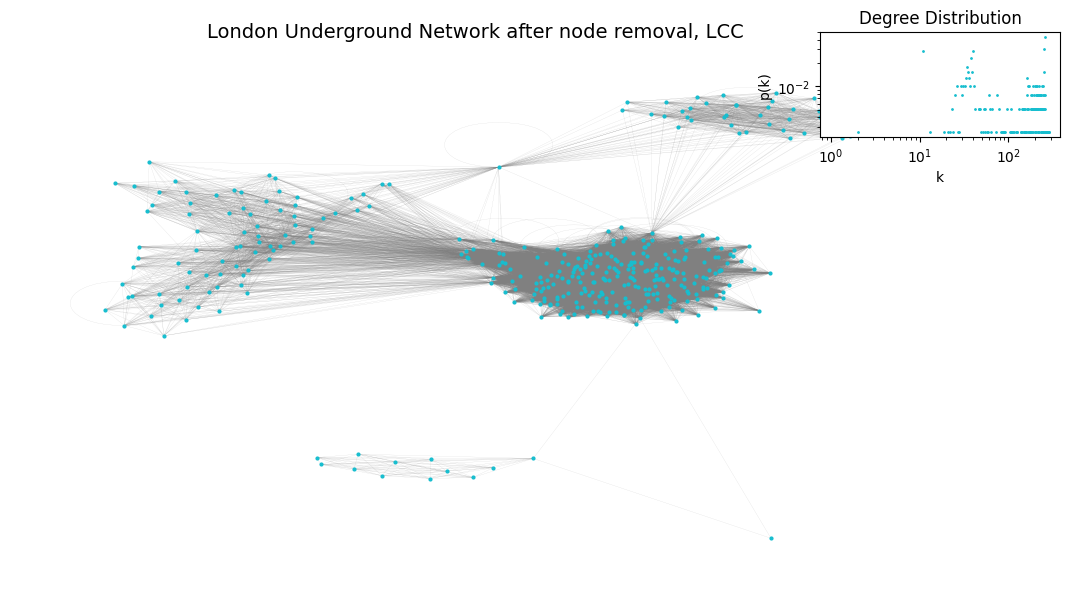

In [99]:
fig, ax = plt.subplots(figsize=(12,7))

# plot largest connected components
nx.draw_networkx_edges(Gsub,
                       pos=pos,
                       edge_color='gray',
                       width=0.1,
                       alpha=0.5,
                       ax=ax
                      )
nx.draw_networkx_nodes(Gsub, 
                       pos=pos,
                       node_color='tab:cyan',
                       node_size=4,
                       ax=ax
                      )
ax.axis('off')
ax.set_title('London Underground Network after node removal, LCC', fontsize=14)

# plot the degree distribution
# degree distribution will be covered next lecture 

degree_hist = nx.degree_histogram(tube_DC) 
degree_hist = np.array(degree_hist, dtype=float)
degree_prob = degree_hist/tube_DC.number_of_nodes()

ax2 = fig.add_axes([0.8, 0.75, 0.2, 0.15])
ax2.loglog(np.arange(degree_prob.shape[0]),degree_prob,'b.', color='tab:cyan', markersize=2)
ax2.set_xlabel('k')
ax2.set_ylabel('p(k)')
ax2.set_title('Degree Distribution')


plt.show()

### 2.0 Flows: weighted network
This section will assess the flows of passengers in London's underground network
* Adjust measures in section 1 to make a weighted network and recompute first 10 nodes
* Consider measure for node removal on adjusted weighted network
* Remove only 3 highest ranked nodes according to best performing centrality measure and repeat this for adjusted measure.

In [101]:
## File has been updated to remove zero values from Battersea Park
# Read in the edgelist file from csv
ldn_tube = pd.read_csv("london_flows_updated.csv")

# Print data (first five rows)
ldn_tube.head()

station_origin station_destination  flows  population     jobs     distance
0     Abbey Road   Bank and Monument    0.0       599.0  78549.0  8131.525097
1     Abbey Road             Beckton    1.0       599.0    442.0  8510.121774
2     Abbey Road           Blackwall    3.0       599.0    665.0  3775.448872
3     Abbey Road        Canary Wharf    1.0       599.0  58772.0  5086.514220
4     Abbey Road        Canning Town   37.0       599.0  15428.0  2228.923167

/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **

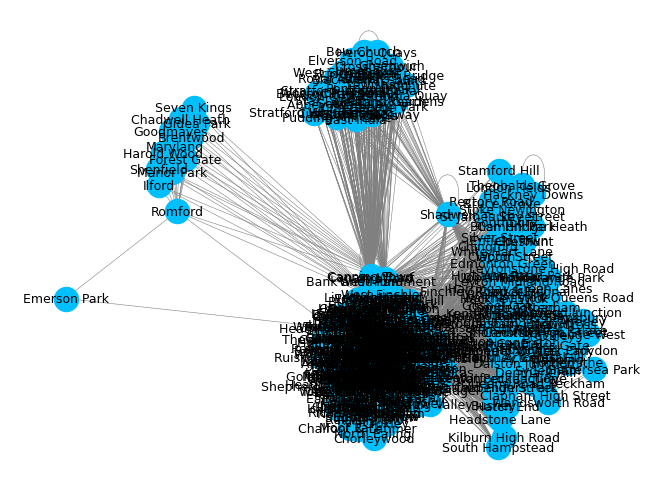

In [103]:
# Create graph object
tube_updated = nx.from_pandas_edgelist(ldn_tube, 'station_origin', 'station_destination', 'flows')

# Plot graph
nx.draw(tube_updated,
        with_labels = True,
        node_color='deepskyblue',
        font_size=9,
        font_color='black',
        edge_color='gray',
        width=0.4)

In [104]:
print(tube_updated)

Graph with 399 nodes and 31718 edges


Re-compute centrality measures for updated dataset

In [105]:
#Let us compute the degree centrality
deg_stations2=nx.degree(tube_updated)

# Print degree as list: 
list(deg_stations2)[0:10]

[('Abbey Road', 34),
 ('Bank and Monument', 305),
 ('Beckton', 43),
 ('Blackwall', 40),
 ('Canary Wharf', 307),
 ('Canning Town', 304),
 ('Crossharbour', 42),
 ('Custom House', 44),
 ('Cutty Sark', 44),
 ('Cyprus', 42)]

In [106]:
dict(deg_stations2)

{'Abbey Road': 34,
 'Bank and Monument': 305,
 'Beckton': 43,
 'Blackwall': 40,
 'Canary Wharf': 307,
 'Canning Town': 304,
 'Crossharbour': 42,
 'Custom House': 44,
 'Cutty Sark': 44,
 'Cyprus': 42,
 'Devons Road': 41,
 'East India': 44,
 'Island Gardens': 37,
 'King George V': 37,
 'Langdon Park': 41,
 'Lewisham': 42,
 'Limehouse': 46,
 'London City Airport': 41,
 'Pontoon Dock': 42,
 'Poplar': 42,
 'Prince Regent': 44,
 'Royal Albert': 39,
 'Shadwell': 98,
 'South Quay': 44,
 'Star Lane': 37,
 'Stratford': 367,
 'Stratford High Street': 29,
 'Stratford International': 42,
 'West Ham': 291,
 'West Silvertown': 42,
 'Westferry': 44,
 'Woolwich Arsenal': 40,
 'Acton Central': 64,
 'Barking': 296,
 'Blackhorse Road': 244,
 'Brondesbury': 68,
 'Brondesbury Park': 61,
 'Bushey': 39,
 'Caledonian Road & Barnsbury': 67,
 'Camden Road': 91,
 'Canada Water': 307,
 'Canonbury': 67,
 'Carpenders Park': 45,
 'Crouch Hill': 42,
 'Dalston Kingsland': 68,
 'Denmark Hill': 51,
 'Edmonton Green': 57,

In [107]:
# Let us add the degree data as attribute to the nodes in the graph
# Data needs to be in the form of dictionary, in which nodes are the keys and attibutes are the values.
nx.set_node_attributes(tube_updated,dict(deg_stations2),'degree')

# To check nodes attributes
list(tube_updated.nodes(data=True))[0:10]

[('Abbey Road', {'degree': 34}),
 ('Bank and Monument', {'degree': 305}),
 ('Beckton', {'degree': 43}),
 ('Blackwall', {'degree': 40}),
 ('Canary Wharf', {'degree': 307}),
 ('Canning Town', {'degree': 304}),
 ('Crossharbour', {'degree': 42}),
 ('Custom House', {'degree': 44}),
 ('Cutty Sark', {'degree': 44}),
 ('Cyprus', {'degree': 42})]

In [108]:
# Return degree attributes that we will use for the colour of nodes 
deg_color2=[(node['degree']) for i, node in tube_updated.nodes(data=True)]

print(deg_color2)

[34, 305, 43, 40, 307, 304, 42, 44, 44, 42, 41, 44, 37, 37, 41, 42, 46, 41, 42, 42, 44, 39, 98, 44, 37, 367, 29, 42, 291, 42, 44, 40, 64, 296, 244, 68, 61, 39, 67, 91, 307, 67, 45, 42, 68, 51, 57, 266, 67, 85, 282, 72, 80, 59, 90, 206, 45, 207, 35, 36, 58, 321, 81, 60, 168, 80, 84, 116, 277, 28, 42, 37, 38, 51, 159, 253, 305, 54, 58, 28, 121, 34, 197, 62, 51, 42, 44, 234, 271, 52, 311, 265, 36, 233, 245, 257, 170, 159, 263, 236, 205, 213, 264, 226, 264, 162, 242, 176, 200, 196, 254, 283, 265, 265, 233, 188, 215, 219, 264, 226, 167, 243, 260, 253, 177, 117, 207, 259, 261, 198, 113, 238, 210, 220, 157, 205, 207, 262, 130, 188, 218, 203, 246, 198, 262, 211, 216, 247, 233, 179, 175, 261, 265, 265, 229, 264, 204, 239, 262, 257, 229, 262, 196, 172, 225, 237, 265, 197, 264, 190, 239, 199, 200, 216, 233, 201, 265, 209, 158, 265, 218, 252, 218, 222, 203, 252, 125, 231, 243, 223, 265, 202, 264, 242, 252, 207, 215, 264, 235, 229, 306, 267, 236, 235, 255, 248, 262, 140, 262, 218, 220, 216, 216, 12

In [109]:
# For setting node size based on degree values
deg_size2=[(float(node['degree'])/max(deg_color2)*1000) for i, node in tube_updated.nodes(data=True)]
print(deg_size2)

[92.64305177111716, 831.0626702997274, 117.16621253405994, 108.99182561307902, 836.5122615803815, 828.3378746594005, 114.44141689373296, 119.89100817438691, 119.89100817438691, 114.44141689373296, 111.71662125340599, 119.89100817438691, 100.8174386920981, 100.8174386920981, 111.71662125340599, 114.44141689373296, 125.34059945504086, 111.71662125340599, 114.44141689373296, 114.44141689373296, 119.89100817438691, 106.26702997275204, 267.0299727520436, 119.89100817438691, 100.8174386920981, 1000.0, 79.01907356948229, 114.44141689373296, 792.9155313351499, 114.44141689373296, 119.89100817438691, 108.99182561307902, 174.38692098092642, 806.5395095367847, 664.850136239782, 185.28610354223432, 166.2125340599455, 106.26702997275204, 182.56130790190736, 247.95640326975476, 836.5122615803815, 182.56130790190736, 122.6158038147139, 114.44141689373296, 185.28610354223432, 138.96457765667574, 155.3133514986376, 724.7956403269756, 182.56130790190736, 231.60762942779292, 768.3923705722071, 196.185286

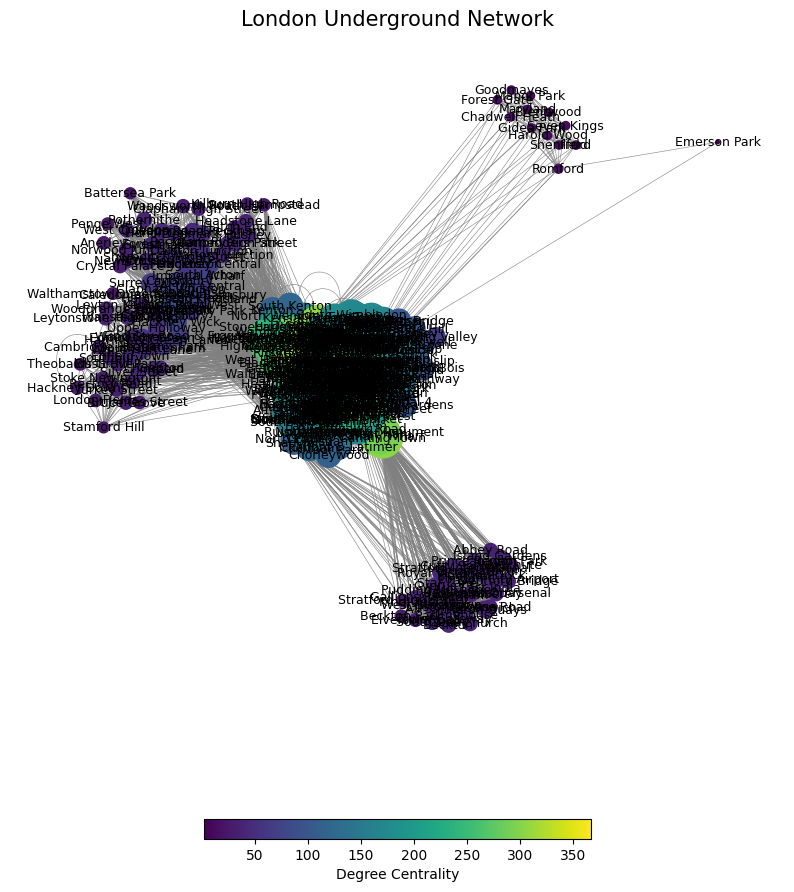

In [110]:
#we can plot the graph using the measure of degree:

fig, ax = plt.subplots(figsize=(10,12))

pos=nx.spring_layout(tube_updated)
nx.draw_networkx_labels(tube_updated, pos,font_size=9,
        font_color='black')
nx.draw_networkx_edges(tube_updated, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(tube_updated,
        pos = pos,
        node_color= deg_color2,
        node_size= deg_size2)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London Underground Network",fontsize=15)
plt.show()

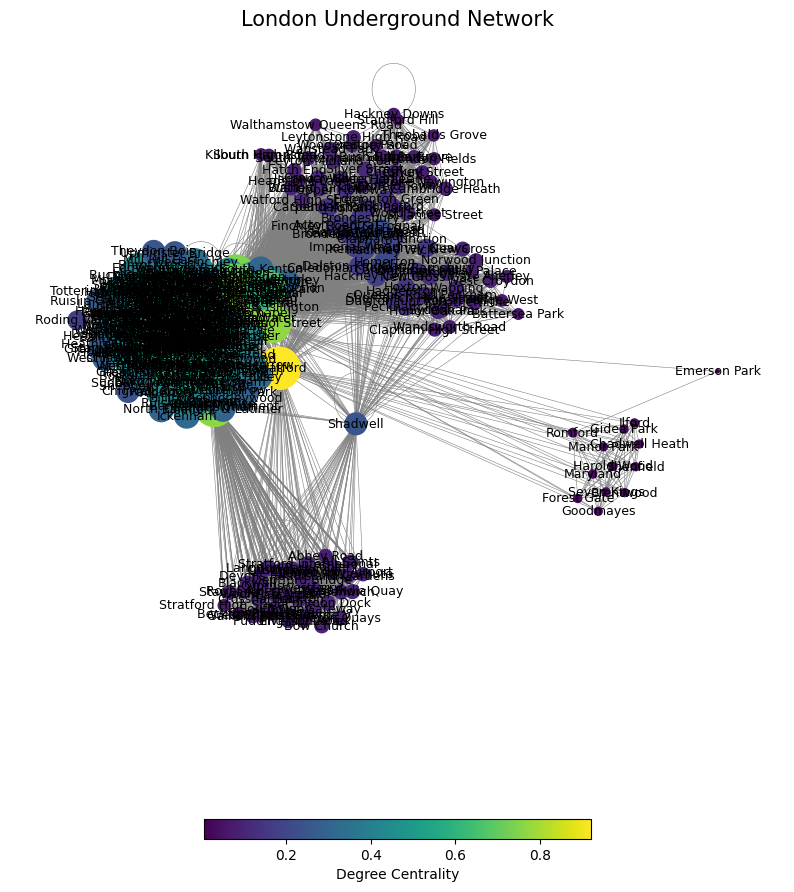

In [111]:
#  We can calculate the normalised version of degree centrality using networkx function:
deg_tube_norm2 =nx.degree_centrality(tube_updated)


nx.set_node_attributes(tube_updated,dict(deg_tube_norm2),'degree_norm')

deg_color_norm2=[(node['degree_norm']) for i, node in tube_updated.nodes(data=True)]
deg_size_norm2=[(node['degree_norm']*1000) for i, node in tube_updated.nodes(data=True)]


fig, ax = plt.subplots(figsize=(10,12))


pos=nx.spring_layout(tube_updated)
nx.draw_networkx_edges(tube_updated, pos,edge_color='gray', 
        width=0.4)
nx.draw_networkx_labels(tube_updated, pos,font_size=9,
        font_color='black')
nod=nx.draw_networkx_nodes(tube_updated,
        pos = pos,
        node_color= deg_color_norm2,
        node_size= deg_size_norm2)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London Underground Network",fontsize=15)
plt.show()

#Note that values now go from 0 to 1

In [112]:
#  We can calculate the degree centrality using networkx function:
deg_stations2 =nx.degree_centrality(tube_updated)
nx.set_node_attributes(tube_updated,dict(deg_stations2),'degree')s

In [114]:
# To dataframe using the nodes as the index
df2 = pd.DataFrame(index=tube_updated.nodes())
#df['distance'] = pd.Series(nx.get_node_attributes(tube_stations2, 'distance'))
df2['degree'] = pd.Series(nx.get_node_attributes(tube_updated, 'degree'))

df_sorted2 = df2.sort_values(["degree"], ascending=False)
df_sorted2[0:10]

degree
Stratford             0.922111
Highbury & Islington  0.806533
Whitechapel           0.781407
West Brompton         0.776382
Canada Water          0.771357
Canary Wharf          0.771357
Liverpool Street      0.768844
Bank and Monument     0.766332
Richmond              0.766332
Canning Town          0.763819

In [118]:
#topological closeness
clos_top_tube=nx.closeness_centrality(tube_updated)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(tube_updated,clos_top_tube,'closeness_top')

pd.DataFrame.from_dict(clos_top_tube,columns=['closeness_top'],orient='index')[0:10]

closeness_top
Abbey Road              0.515544
Bank and Monument       0.810591
Beckton                 0.521625
Blackwall               0.519582
Canary Wharf            0.810591
Canning Town            0.808943
Crossharbour            0.520942
Custom House            0.522310
Cutty Sark              0.522310
Cyprus                  0.520942

/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **

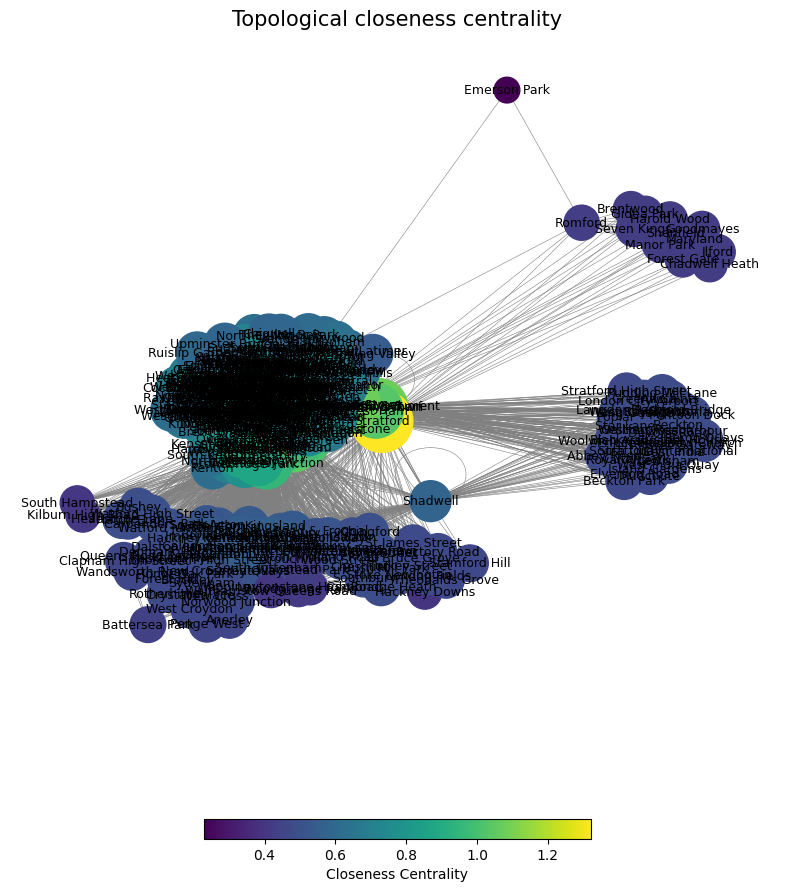

In [119]:
# Set color and size
# Closeness values
clos_val=[(i[1]['closeness_top']) for i in tube_stations.nodes(data=True)]


normalised_clos_top_tube=[((i[1]['closeness_top']-min(clos_val))/(max(clos_val)-min(clos_val))) for i in tube_updated.nodes(data=True)]
clos_top_tube_size=[((i[1]['closeness_top']-min(clos_val))/(max(clos_val)-min(clos_val))*1500) for i in tube_updated.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(10,12))

pos=nx.spring_layout(tube_updated)
nx.draw_networkx_edges(tube_updated, pos,edge_color='gray', 
        width=0.4)
nx.draw_networkx_labels(tube_updated, pos,font_size=9,
        font_color='black')
nod=nx.draw_networkx_nodes(tube_updated,
        pos = pos,
        node_color= normalised_clos_top_tube,
        node_size=clos_top_tube_size )

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Topological closeness centrality",fontsize=15)
plt.show()

In [120]:
#topological closeness centrality
clos_t=nx.closeness_centrality(tube_updated)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_updated,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df3 = pd.DataFrame(index= tube_updated.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(tube_stations, 'station_name'))
df3['closeness_t'] = pd.Series(nx.get_node_attributes(tube_updated, 'closeness_t'))

df_sorted3 = df3.sort_values(["closeness_t"], ascending=False)
df_sorted3[0:10]

closeness_t
Stratford                0.927739
Highbury & Islington     0.836134
Whitechapel              0.820619
West Brompton            0.817248
Canada Water             0.813906
Richmond                 0.810591
Canary Wharf             0.810591
Bank and Monument        0.810591
Liverpool Street         0.808943
Canning Town             0.808943

#### Weighted Closeness Centrality

In [122]:
#Weighted closeness centrality: 
clos_w=nx.closeness_centrality(tube_updated, distance='length')
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_updated,clos_w,'closeness_w')

# To ataframe using the nodes as the index
df4 = pd.DataFrame(index=tube_updated.nodes())
#df4['station_name'] = pd.Series(nx.get_node_attributes(tube_update, 'station_name'))
df4['closeness_w'] = pd.Series(nx.get_node_attributes(tube_updated, 'closeness_w'))

df_sorted4 = df4.sort_values(["closeness_w"], ascending=False)
df_sorted4[0:10]

closeness_w
Stratford                0.927739
Highbury & Islington     0.836134
Whitechapel              0.820619
West Brompton            0.817248
Canada Water             0.813906
Richmond                 0.810591
Canary Wharf             0.810591
Bank and Monument        0.810591
Liverpool Street         0.808943
Canning Town             0.808943

In [123]:
# given that the network is weighted let us introduce the weights.
# as an initial trial, let us see what happens when we include the weights as the strength of the interaction
clos_tube_wrong=nx.closeness_centrality(tube_updated, distance='weight')

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(tube_updated,clos_tube_wrong,'closeness')

pd.DataFrame.from_dict(clos_tube_wrong,columns=['closeness'],orient='index')[0:10]

closeness
Abbey Road          0.515544
Bank and Monument   0.810591
Beckton             0.521625
Blackwall           0.519582
Canary Wharf        0.810591
Canning Town        0.808943
Crossharbour        0.520942
Custom House        0.522310
Cutty Sark          0.522310
Cyprus              0.520942

/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **

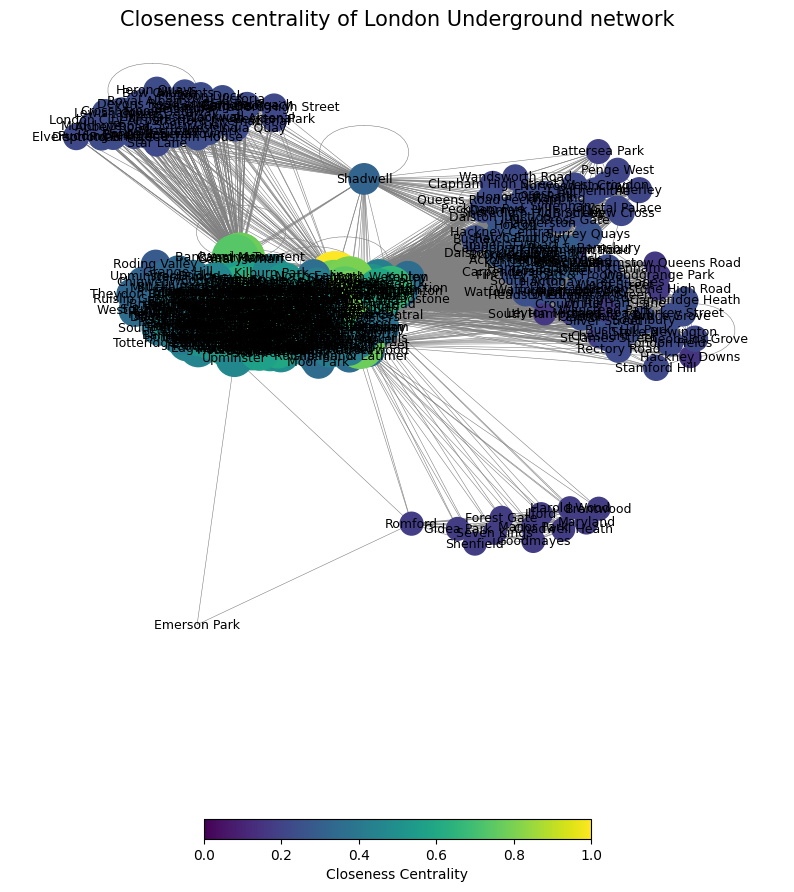

In [124]:
# Set color and size
clos_w_val=[(i[1]['closeness']) for i in tube_updated.nodes(data=True)]


clos_w_dad_color=[((i[1]['closeness']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))) for i in tube_updated.nodes(data=True)]
clos_w_dad_size=[((i[1]['closeness']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))*1500) for i in tube_updated.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(10,12))

pos=nx.spring_layout(tube_updated)
nx.draw_networkx_edges(tube_updated, pos,edge_color='gray', 
        width=0.4)
nx.draw_networkx_labels(tube_updated, pos,font_size=9,
        font_color='black')
nod=nx.draw_networkx_nodes(tube_updated,
        pos = pos,
        node_color= clos_w_dad_color,
        node_size=clos_w_dad_size )

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Closeness centrality of London Underground network",fontsize=15)
plt.show()

In [125]:
# Note that we have to invert the weights, since they are meant to represent a distance.
# the higher the value to closer they are
v_weights={(e1, e2):round(1./weight,7) for e1, e2, weight in tube_updated.edges(data='weight')}

# Let us add the inverted weight as an attribute to the edges in the graph
nx.set_edge_attributes(tube_updated, v_weights, 'v_weights')

# Print edge list with attributes
list(tube_updated.edges(data = True))[0:10]

TypeError: unsupported operand type(s) for /: 'float' and 'NoneType'

In [127]:
#Weighted closeness centrality: 
clos_tube_wrong=nx.closeness_centrality(tube_updated, distance='length')
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_updated,clos_tube_wrong,'closeness_tw')

# To ataframe using the nodes as the index
df4 = pd.DataFrame(index=tube_updated.nodes())
#df4['station_name'] = pd.Series(nx.get_node_attributes(tube_update, 'station_name'))
df4['closeness_tw'] = pd.Series(nx.get_node_attributes(tube_updated, 'closeness_tw'))

df_sorted4 = df4.sort_values(["closeness_tw"], ascending=False)
df_sorted4[0:10]

closeness_tw
Stratford                 0.927739
Highbury & Islington      0.836134
Whitechapel               0.820619
West Brompton             0.817248
Canada Water              0.813906
Richmond                  0.810591
Canary Wharf              0.810591
Bank and Monument         0.810591
Liverpool Street          0.808943
Canning Town              0.808943

#### Weighted Betweenness Centrality

In [128]:
#Let us compute the betweenness centrality for the network 
bet_tube=nx.betweenness_centrality(tube_updated,weight='weight', normalized=False)

pd.DataFrame.from_dict(bet_tube,columns=['betweenness'],orient='index')[0:10]

betweenness
Abbey Road            0.628393
Bank and Monument  2208.627931
Beckton               2.630688
Blackwall             1.732149
Canary Wharf       2208.627931
Canning Town       2192.848026
Crossharbour          1.668217
Custom House          2.852333
Cutty Sark            2.852333
Cyprus                2.603995

/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **

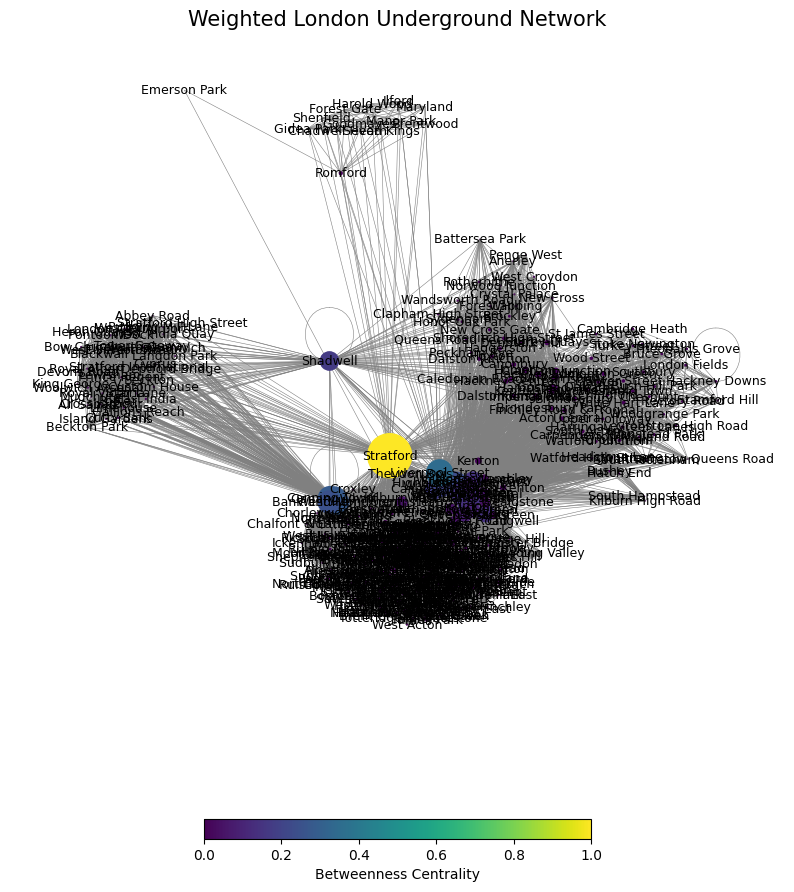

In [129]:
# Let us add the betweenness centrality as attribute to the nodes in the graph
nx.set_node_attributes(tube_updated,bet_tube,'betweenness')

# Lets set color and size of nodes according to betweenness values
betweenness_values=[(i[1]['betweenness']) for i in tube_updated.nodes(data=True)]

bet_color=[(i[1]['betweenness']/max(betweenness_values)) for i in tube_updated.nodes(data=True)]
bet_size=[(i[1]['betweenness']/max(betweenness_values)*1000) for i in tube_updated.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(10,12))

pos=nx.spring_layout(tube_updated)
nx.draw_networkx_edges(tube_updated, pos,edge_color='gray', 
        width=0.4)
nx.draw_networkx_labels(tube_updated, pos,font_size=9,
        font_color='black')
nod=nx.draw_networkx_nodes(tube_updated,
        pos = pos,
        node_color= bet_color,
        node_size= bet_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Weighted London Underground Network",fontsize=15)
plt.show()

In [131]:
### Weighted betweenness centrality:
#Let us compute the betweenness centrality for the network, considering the ppopulation between stations:

bet_london_w=nx.betweenness_centrality(tube_updated,weight='population',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_updated,bet_london_w,'betweenness_w')

In [133]:
# To dataframe using the nodes as the index
df5 = pd.DataFrame(index=tube_updated.nodes())
#df5['station_name'] = pd.Series(nx.get_node_attributes(tube_updated, 'station_name'))
df5['betweenness_w'] = pd.Series(nx.get_node_attributes(tube_updated, 'betweenness_w'))

df_sorted5 = df5.sort_values(["betweenness_w"], ascending=False)
df_sorted5[0:10]

betweenness_w
Stratford               7785.967073
Liverpool Street        2710.377160
Canary Wharf            2208.627931
Bank and Monument       2208.627931
Canning Town            2192.848026
West Ham                1939.641831
Highbury & Islington    1818.904025
Whitechapel             1554.965946
Canada Water            1413.977663
Shadwell                1348.588902

/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **

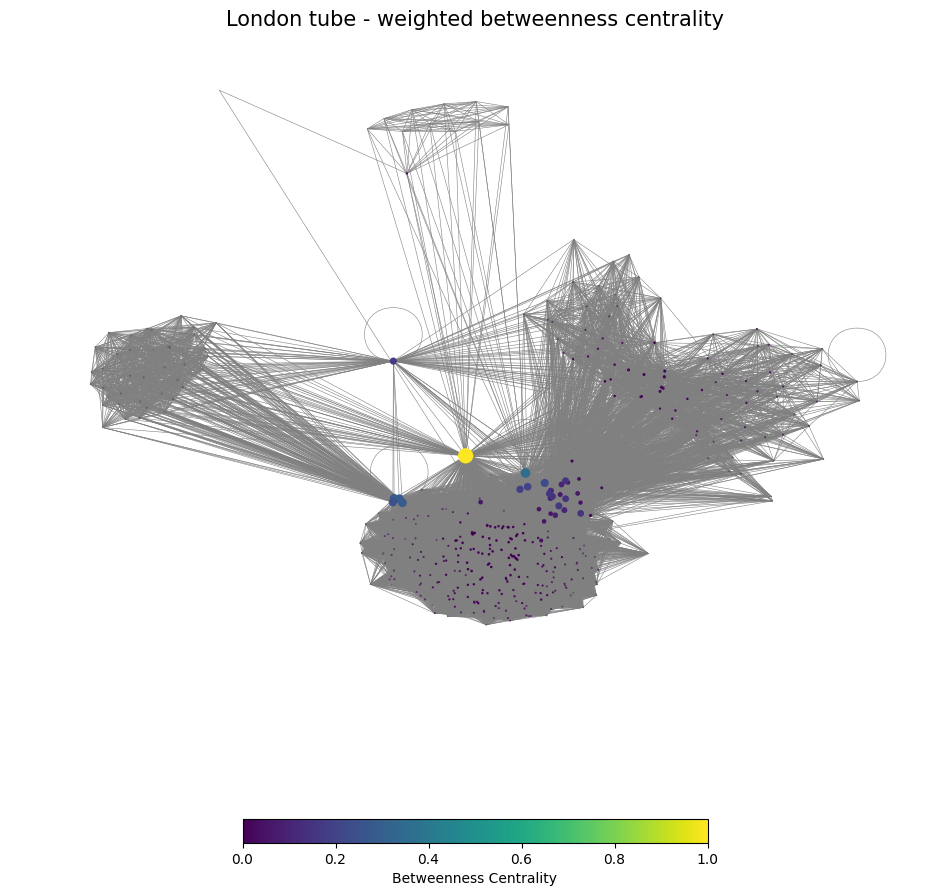

In [134]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness_w']) for i in tube_updated.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in tube_updated.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values))*100 for i in tube_updated.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(tube_updated, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(tube_updated,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube - weighted betweenness centrality",fontsize=15)
plt.show()

In [140]:
### Weighted betweenness centrality:
#Let us compute the betweenness centrality for the network, considering the flows between stations:
bet_london2_w=nx.betweenness_centrality(tube_updated,weight='flows',normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_updated,bet_london2_w,'betweenness_w')

In [136]:
# To dataframe using the nodes as the index
df6 = pd.DataFrame(index=tube_updated.nodes())
#df5['station_name'] = pd.Series(nx.get_node_attributes(tube_updated, 'station_name'))
df6['betweenness_w'] = pd.Series(nx.get_node_attributes(tube_updated, 'betweenness_w'))

df_sorted6 = df6.sort_values(["betweenness_w"], ascending=False)
df_sorted6[0:10]

betweenness_w
Stratford             2.058580e+98
West Ham              1.039563e+97
Harlesden             3.966475e+94
Harrow & Wealdstone   3.966061e+94
Kensington            1.982932e+94
West Brompton         5.744202e+93
Shepherd's Bush       2.824215e+93
Kew Gardens           1.617041e+93
Surrey Quays          8.268741e+92
Kenton                6.373616e+92

#### Weighted Closeness Centrality

In [149]:
#Weighted closeness centrality: 
clos_w2=nx.closeness_centrality(tube_updated, distance='flows')
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_updated,clos_w2,'closeness_w2')

# To ataframe using the nodes as the index
df7 = pd.DataFrame(index=tube_updated.nodes())
#df4['station_name'] = pd.Series(nx.get_node_attributes(tube_update, 'station_name'))
df7['closeness_w2'] = pd.Series(nx.get_node_attributes(tube_updated, 'closeness_w2'))

df_sorted7 = df7.sort_values(["closeness_w2"], ascending=False)
df_sorted7[0:10]

ValueError: ('Contradictory paths found:', 'negative weights?')

In [148]:
#Weighted closeness centrality: 
cc_tube_w=nx.closeness_centrality(tube_updated, distance='flows')
# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_updated,cc_tube_w,'closeness_wf')

# To ataframe using the nodes as the index
df9 = pd.DataFrame(index=tube_updated.nodes())
#df4['station_name'] = pd.Series(nx.get_node_attributes(tube_update, 'station_name'))
df9['closeness_wf'] = pd.Series(nx.get_node_attributes(tube_updated, 'closeness_wf'))

df_sorted9 = df9.sort_values(["closeness_wf"], ascending=False)
df_sorted9[0:10]

ValueError: ('Contradictory paths found:', 'negative weights?')

#### Weighted Degree Centrality

In [147]:
### Weighted betweenness centrality:
#Let us compute the betweenness centrality for the network, considering the ppopulation between stations:

deg_tube_w=nx.degree_centrality(tube_updated,weight='flows',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(tube_updated,deg_tube_w,'degree_w')

TypeError: degree_centrality() got an unexpected keyword argument 'weight'

In [143]:
# To dataframe using the nodes as the index
df8 = pd.DataFrame(index=tube_updated.nodes())
#df5['station_name'] = pd.Series(nx.get_node_attributes(tube_updated, 'station_name'))
df8['degree_w'] = pd.Series(nx.get_node_attributes(tube_updated, 'degree_w'))

df_sorted8 = df8.sort_values(["degree_w"], ascending=False) #table below is incorrect, computed betweenness instead of DC.
df_sorted8[0:10]

degree_w
Stratford             7785.967073
Liverpool Street      2710.377160
Canary Wharf          2208.627931
Bank and Monument     2208.627931
Canning Town          2192.848026
West Ham              1939.641831
Highbury & Islington  1818.904025
Whitechapel           1554.965946
Canada Water          1413.977663
Shadwell              1348.588902

#### Node removal

In [150]:
tube_updated2=tube_updated

In [152]:
#To remove nodes: 
#If we want to remove the node with the max value of betweenness centrality:

maxbet=[n for n in tube_updated2.nodes() if tube_updated2.nodes[n]['betweenness_w'] == max(betweenness_t_values)]
maxbet

['Stratford']

In [153]:
# Number of existing nodes:
l1=list(tube_updated2.nodes)
len(l1)

399

In [154]:
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
tube_updated2.remove_nodes_from(maxbet)

In [155]:
# number of nodes after the removal
l2=list(tube_updated2.nodes)
len(l2)

398

In [156]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(l2))
rem_nodes

['Stratford']

In [158]:
import numpy as np
from operator import itemgetter

In [160]:
# To remove  3 highest values:
# List of nodes:
values_sorted = sorted(bet_london2_w.items(), key=itemgetter(1), reverse=True)
sorted_three=[e for e,v in values_sorted[:3]]
sorted_three

['Stratford', 'West Ham', 'Harlesden']

In [161]:
#Remove nodes:
tube_updated2.remove_nodes_from(sorted_three)

In [162]:
# number of nodes after removal:
l3=list(tube_updated2.nodes)
len(l3)

396

In [163]:
# to check which is the one missing:
list(set(l2) - set(l3))

['Harlesden', 'West Ham']

In [164]:
# Has the graph one component?
print(nx.is_connected(tube_updated2))

True


In [165]:
# number of connected components
nx.number_connected_components(tube_updated2)

1

In [166]:
# To comput the size ( number of node) of each component
Subg = [tube_updated2.subgraph(c).copy() for c in nx.connected_components(tube_updated2)]
[len(subgraph.nodes) for subgraph in Subg]

[396]

In [167]:
# To dataframe using the nodes as the index
df10 = pd.DataFrame(index=tube_updated2.nodes())
#df5['station_name'] = pd.Series(nx.get_node_attributes(tube_updated, 'station_name'))
df10['betweenness_w'] = pd.Series(nx.get_node_attributes(tube_updated2, 'betweenness_w'))

df_sorted10 = df10.sort_values(["betweenness_w"], ascending=False)
df_sorted10[0:10]

betweenness_w
Liverpool Street        2710.377160
Bank and Monument       2208.627931
Canary Wharf            2208.627931
Canning Town            2192.848026
Highbury & Islington    1818.904025
Whitechapel             1554.965946
Canada Water            1413.977663
Shadwell                1348.588902
Richmond                1245.143236
West Brompton           1201.296319

In [169]:
# let's measure the clustering coefficient
c1 = nx.clustering(tube_updated2)
print(type(c1))

# we can sort the dictionary by the clustering coefficient
c1 = sorted(c1.items(), key=lambda pair: pair[1], reverse=True)
print(c1[:5])

#what is the average clustering coefficient
c_avg1 = sum([i[1] for i in c1]) / len(c1)
print(f'avg clustering coefficient: {c_avg1}')

<class 'dict'>
[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
avg clustering coefficient: 0.8459501081084732


In [170]:
# we can see in the plot that the graph has more then one component
# let's subset this graph to the largest connected component
Gcc = sorted(nx.connected_components(tube_updated2), key=len, reverse=True)
Gsub = tube_updated2.subgraph(Gcc[0])

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(tube_updated2.nodes)) * 100

lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
# print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')
print(f"Highest degree nodes: \n \t" \
        f"{lb.join(f'{hero[0]}: {hero[1]}' for hero in sorted(Gsub.degree(), key=lambda pair: pair[1], reverse=True)[0:5])}")

Largest Connected Compenent:100.00%
Number of connected components:1
Highest degree nodes: 
 	Highbury & Islington: 318
 	Whitechapel: 308
 	West Brompton: 306
 	Canary Wharf: 304
 	Canada Water: 304


/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/1172840962.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  ax2.loglog(np.arange(degree_prob.shape[0]),degree_prob,'b.', color='orange', markersize=2)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **k

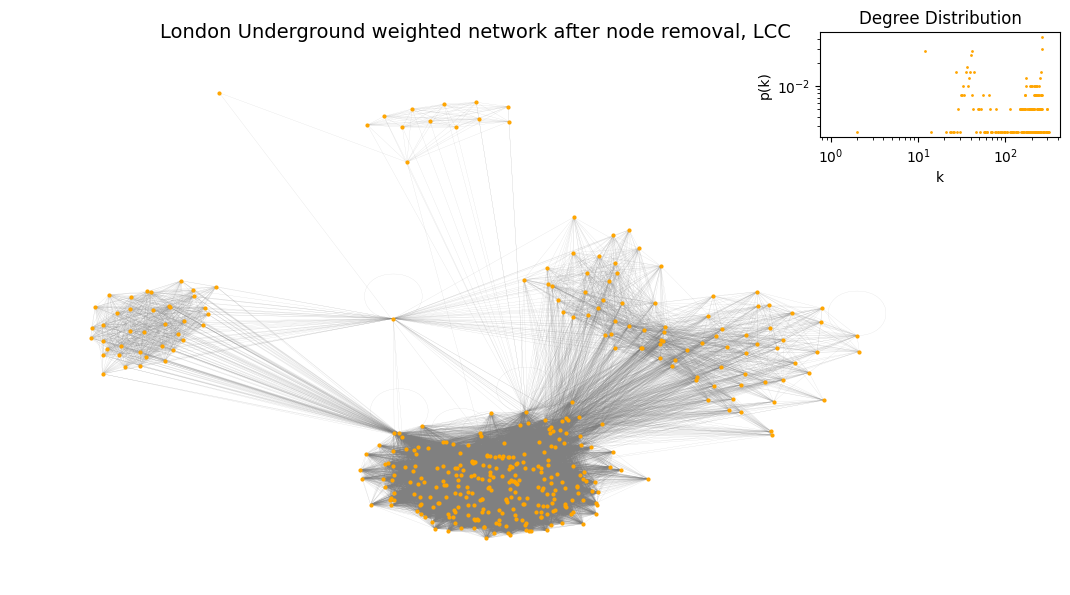

In [172]:
fig, ax = plt.subplots(figsize=(12,7))

# plot largest connected components
nx.draw_networkx_edges(Gsub,
                       pos=pos,
                       edge_color='gray',
                       width=0.1,
                       alpha=0.5,
                       ax=ax
                      )
nx.draw_networkx_nodes(Gsub, 
                       pos=pos,
                       node_color='orange',
                       node_size=4,
                       ax=ax
                      )
ax.axis('off')
ax.set_title('London Underground weighted network after node removal, LCC', fontsize=14)

# plot the degree distribution
# degree distribution will be covered next lecture 

degree_hist = nx.degree_histogram(tube_updated2) 
degree_hist = np.array(degree_hist, dtype=float)
degree_prob = degree_hist/tube_updated2.number_of_nodes()

ax2 = fig.add_axes([0.8, 0.75, 0.2, 0.15])
ax2.loglog(np.arange(degree_prob.shape[0]),degree_prob,'b.', color='orange', markersize=2)
ax2.set_xlabel('k')
ax2.set_ylabel('p(k)')
ax2.set_title('Degree Distribution')


plt.show()

In [173]:
from networkx.algorithms.community import greedy_modularity_communities
import itertools

# let's start with greedy modularity
communities_fg = greedy_modularity_communities(Gsub)

print(f'number of communities: {len(communities_fg)}')

number of communities: 3


IndexError: list index out of range

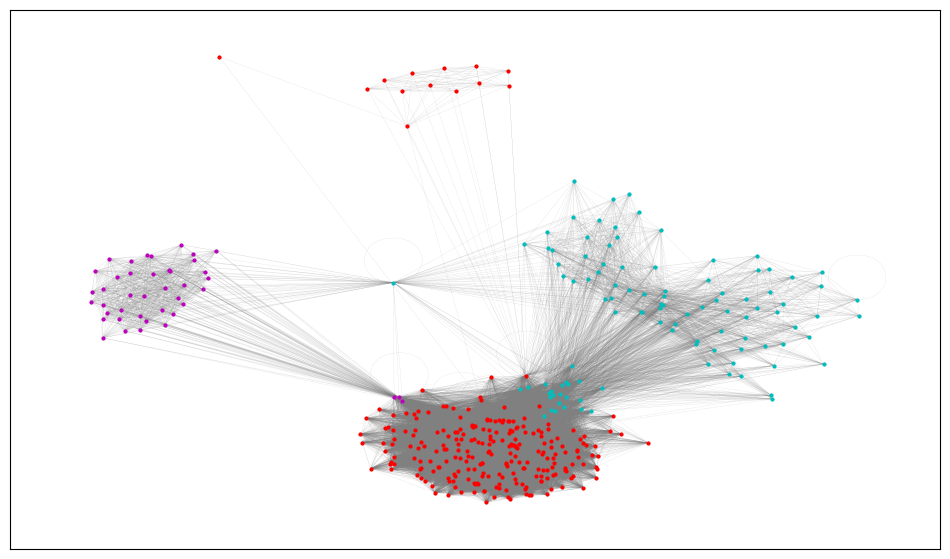

In [174]:
# we can sort this communities to plot only the largest communities 
communities_fg = sorted(communities_fg)

fig, ax = plt.subplots(figsize=(12,7))

# plot the entire graph with gray nodes
nx.draw_networkx_nodes(Gsub, 
                       pos=pos,
                       node_color='grey',
                       node_size=2,
                       ax=ax, 
                      )

nx.draw_networkx_edges(Gsub,
                       pos=pos,
                       edge_color='gray',
                       width=0.1,
                       alpha=0.5,
                       ax=ax
                      )

# set the colors we will be using for each community
cls = ['r', 'c', 'm', 'y', 'b']
i=0
while i<5:
    nx.draw_networkx_nodes(Gsub, 
                           pos=pos,
                           node_color=cls[i],
                           node_size=4,
                           ax=ax, 
                           nodelist= list(communities_fg[i])
                          )
    i+=1
    
plt.axis('off')
plt.title('Fast-Greedy Community Detection on London Underground Network, LCC', fontsize=14)

plt.show()

## Part 2: Spatial Interaction Models (SIM)
### 3.0 Models and Calibration
Using the information of population, jobs and flows, select a SIM and calibrate the parameter for the cost function (beta)

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [176]:
#ldn_tube - name of the file before centrality measures.
ldn_tube.head(10)

station_origin station_destination  flows  population     jobs     distance
0     Abbey Road   Bank and Monument    0.0       599.0  78549.0  8131.525097
1     Abbey Road             Beckton    1.0       599.0    442.0  8510.121774
2     Abbey Road           Blackwall    3.0       599.0    665.0  3775.448872
3     Abbey Road        Canary Wharf    1.0       599.0  58772.0  5086.514220
4     Abbey Road        Canning Town   37.0       599.0  15428.0  2228.923167
5     Abbey Road        Crossharbour    1.0       599.0   1208.0  6686.475560
6     Abbey Road        Custom House    0.0       599.0    845.0  3824.855630
7     Abbey Road          Cutty Sark    2.0       599.0   1748.0  8503.898909
8     Abbey Road              Cyprus    7.0       599.0    850.0  6532.099618
9     Abbey Road         Devons Road    1.0       599.0    611.0  3958.324171

Text(0, 0.5, 'Total Flows')

/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **

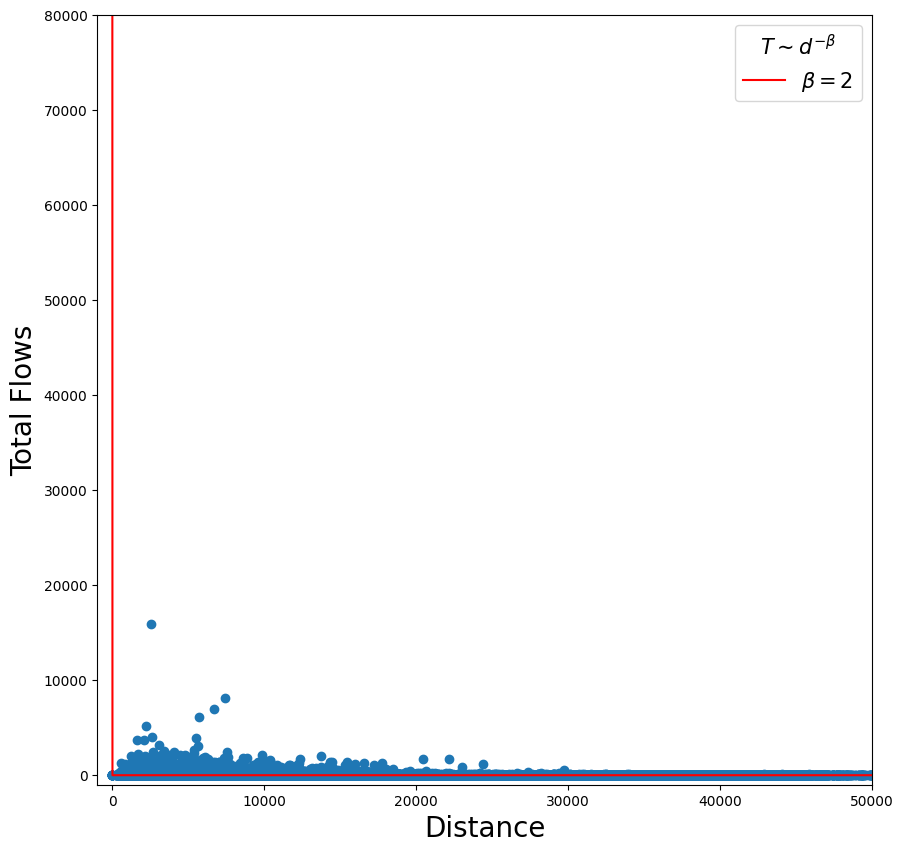

In [178]:
#first plot the Total commuter flows denoted by T against distance denoted by d
#and then fit a model line T ~ d^-beta with beta=2

#set the base axis
fig, ax = plt.subplots(figsize=(10,10))

#scatter plot
ax.scatter(x = ldn_tube["distance"], y=ldn_tube["flows"])
#line plot
line = np.arange(0.0002, 50_000, 0.1)
ax.plot(line, line**-2, color ="r", label = "$\\beta=2$")
#add a legend
ax.legend(title = "$T \\sim d^{-\\beta}$", fontsize = 15, title_fontsize=15)
#axis limits
ax.set_xlim([-1000,50000])
ax.set_ylim([-1000, 80000])
#set the labels
ax.set_xlabel("Distance", fontsize = 20)
ax.set_ylabel("Total Flows", fontsize = 20)

Text(0, 0.5, 'Total Flows')

/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **

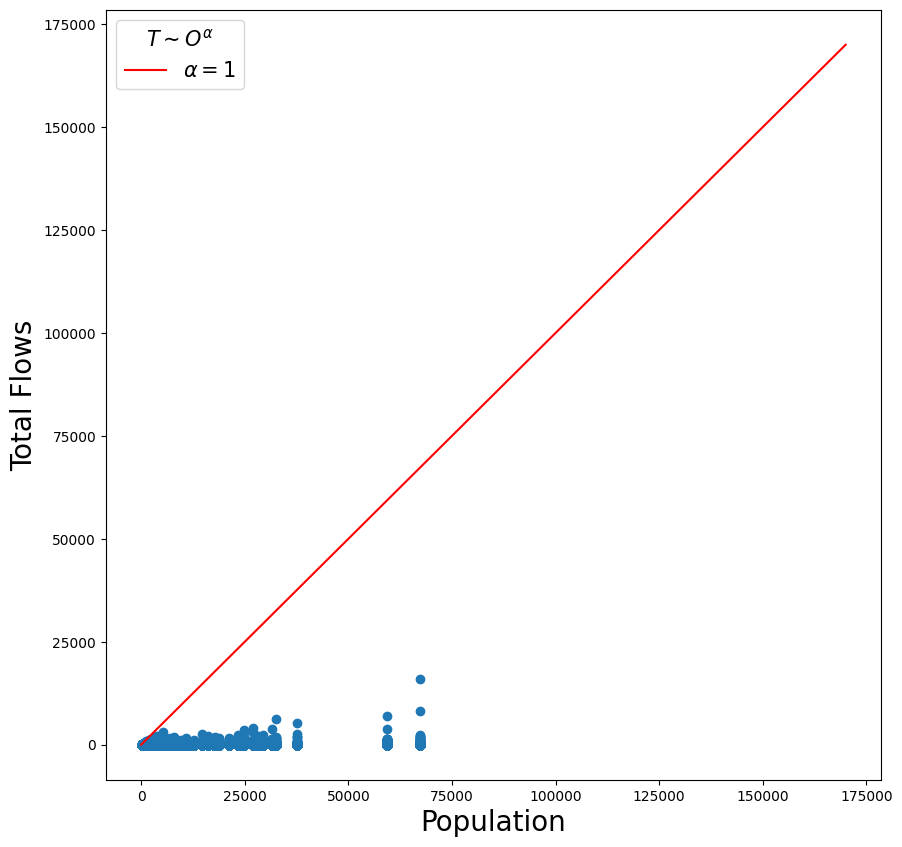

In [180]:
#Let us now look at the behaviour of the flows with respect to the population at the origin denoted by O
#and then fit a model line T ~ O^alpha, for alpha=1

#set the base axis
fig, ax = plt.subplots(figsize=(10,10))

#scatter plot
ax.scatter(x = ldn_tube["population"], y=ldn_tube["flows"])
#line plot
line = np.arange(0.0002, 170_000, 0.1)
ax.plot(line, line**1, color ="r", label = "$\\alpha=1$")
#add a legend
ax.legend( fontsize = 15, title = "$T \sim O^{\\alpha}$", title_fontsize=15)
#axis labels
ax.set_xlabel("Population", fontsize = 20)
ax.set_ylabel("Total Flows", fontsize = 20)

Text(0, 0.5, 'Total')

/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **

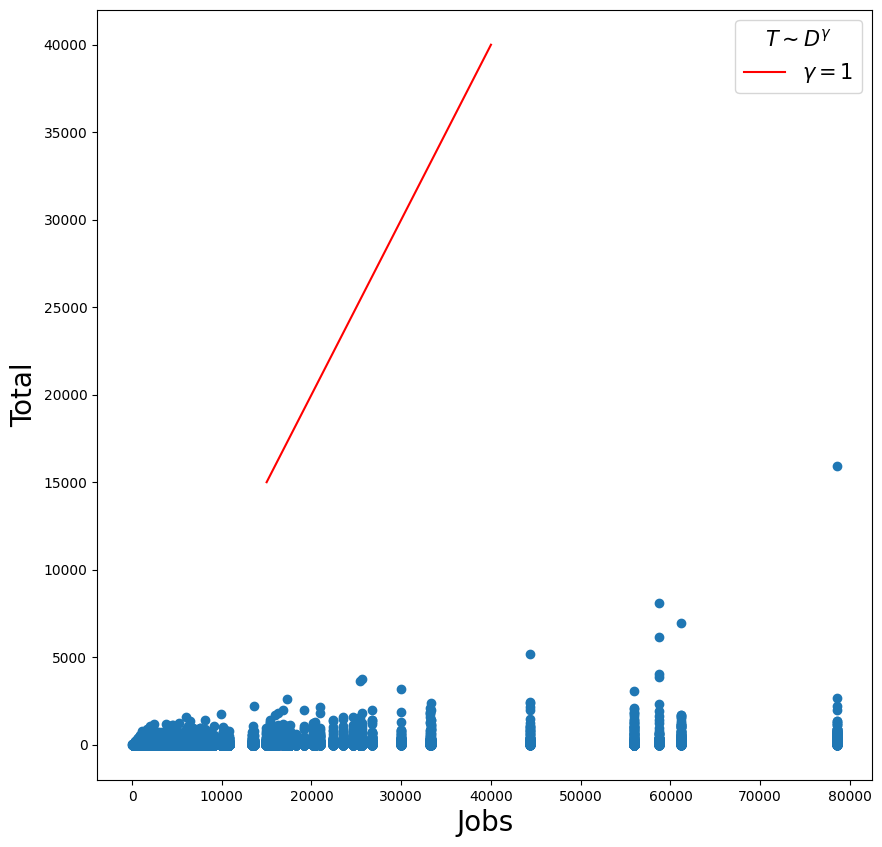

In [181]:
#Now let us look at the behaviour of the flows with respect to the jobs at destination denoted by D
# and then fit a model line  T ~ D^gamma. We will fit a line for gamma=1

#set the base axis
fig, ax = plt.subplots(figsize=(10,10))

#scatter plot
ax.scatter(x = ldn_tube["jobs"], y=ldn_tube["flows"])
#line plot
line = np.arange(15_000, 40000, 0.1)
ax.plot(line, line**1, color ="r", label = "$\\gamma=1$")
#add a legend
ax.legend( fontsize = 15, title = "$T \sim D^{\\gamma}$", title_fontsize=15)
#axis labels
ax.set_xlabel("Jobs", fontsize = 20)
ax.set_ylabel("Total", fontsize = 20)

In [183]:
ldn_tube_2=ldn_tube

In [186]:
import numpy as np
#now we can create a pivot table to turn paired list into a matrix, and compute the margin as well
ldn_tube_st = pd.pivot_table(ldn_tube, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
ldn_tube_st

/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/951923346.py:3: FutureWarning: The provided callable <function sum at 0x11042d9e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ldn_tube_st = pd.pivot_table(ldn_tube, values ="flows", index="station_origin", columns = "station_destination",
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/951923346.py:3: FutureWarning: The provided callable <function sum at 0x11042d9e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ldn_tube_st = pd.pivot_table(ldn_tube, values ="flows", index="station_origin", columns = "station_destination",
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/951923346.py:3: FutureWarning: The provided callable <function 

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN      3.0   
Aldgate                     NaN            NaN         0.0      NaN   
Aldgate East                NaN            NaN         2.0      0.0   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         2.0      5.0   
Woodgrange Park             NaN            0.0         NaN      NaN   
Woodside Park               NaN            NaN         1.0     26.0   
Woolwich Arsenal           20.0            NaN         NaN      NaN   
All                       345.0          750.0      2202.0   7782.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                   17.0         NaN      35.0       0.0      NaN   
Aldgate                       0.0         NaN       NaN       0.0      NaN   
Aldgate East                  NaN         NaN       0.0       0.0      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                     47.0         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park                11.0         NaN       0.0       NaN      NaN   
Woolwich Arsenal              NaN         7.0       NaN       NaN      NaN   
All                        7932.0       444.0     741.0     256.0    173.0   

station_destination   Angel  ...  Wimbledon  Wimbledon Park  Wood Green  \
station_origin               ...                                          
Abbey Road              NaN  ...        NaN             NaN         NaN   
Acton Central           NaN  ...        NaN             NaN         NaN   
Acton Town             11.0  ...       77.0             3.0         6.0   
Aldgate                17.0  ...        0.0             NaN         4.0   
Aldgate East           20.0  ...       24.0             0.0         0.0   
...                     ...  ...        ...             ...         ...   
Woodford               22.0  ...        2.0             NaN         1.0   
Woodgrange Park         NaN  ...        NaN             NaN         NaN   
Woodside Park          59.0  ...        0.0             NaN         0.0   
Woolwich Arsenal        NaN  ...        NaN             NaN         NaN   
All                  8103.0  ...     6295.0           596.0      2146.0   

station_destination  Wood Lane  Wood Street  Woodford  Woodgrange Park  \
station_origin                                                           
Abbey Road                 NaN          NaN       NaN              NaN   
Acton Central              NaN          NaN       NaN              0.0   
Acton Town                 9.0          NaN       0.0              NaN   
Aldgate                    8.0          NaN       0.0              NaN   
Aldgate East              12.0          NaN       1.0              NaN   
...                        ...          ...       ...              ...   
Woodford                   NaN          NaN       NaN              NaN   
Woodgrange Park            NaN          NaN       NaN              NaN   
Woodside Park              NaN          NaN       NaN              NaN   
Woolwich Arsenal           NaN          NaN       NaN              NaN   
All                     1578.0        404.0     706.0            242.0   

station_destination  Woodside Park  Woolwich Arsenal        All  
station_origin                                          

In [187]:
ldn_tube_p = pd.pivot_table(ldn_tube, values ="population", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
ldn_tube_p

/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/2524522206.py:1: FutureWarning: The provided callable <function sum at 0x11042d9e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ldn_tube_p = pd.pivot_table(ldn_tube, values ="population", index="station_origin", columns = "station_destination",
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/2524522206.py:1: FutureWarning: The provided callable <function sum at 0x11042d9e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ldn_tube_p = pd.pivot_table(ldn_tube, values ="population", index="station_origin", columns = "station_destination",
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/2524522206.py:1: FutureWarning: The provided callable

station_destination  Abbey Road  Acton Central  Acton Town    Aldgate  \
station_origin                                                          
Abbey Road                  NaN            NaN         NaN        NaN   
Acton Central               NaN            NaN         NaN        NaN   
Acton Town                  NaN            NaN         NaN     3745.0   
Aldgate                     NaN            NaN      2886.0        NaN   
Aldgate East                NaN            NaN      3172.0     3172.0   
...                         ...            ...         ...        ...   
Woodford                    NaN            NaN      4868.0     4868.0   
Woodgrange Park             NaN          530.0         NaN        NaN   
Woodside Park               NaN            NaN      3093.0     3093.0   
Woolwich Arsenal         7892.0            NaN         NaN        NaN   
All                    190997.0       266975.0   1264084.0  1218365.0   

station_destination  Aldgate East  All Saints   Alperton   Amersham   Anerley  \
station_origin                                                                  
Abbey Road                    NaN         NaN        NaN        NaN       NaN   
Acton Central                 NaN         NaN        NaN        NaN       NaN   
Acton Town                 3745.0         NaN     3745.0     3745.0       NaN   
Aldgate                    2886.0         NaN        NaN     2886.0       NaN   
Aldgate East                  NaN         NaN     3172.0     3172.0       NaN   
...                           ...         ...        ...        ...       ...   
Woodford                   4868.0         NaN        NaN        NaN       NaN   
Woodgrange Park               NaN         NaN        NaN        NaN       NaN   
Woodside Park              3093.0         NaN     3093.0        NaN       NaN   
Woolwich Arsenal              NaN      7892.0        NaN        NaN       NaN   
All                     1284827.0    201898.0  1043110.0  1000804.0  119084.0   

station_destination      Angel  ...  Wimbledon  Wimbledon Park  Wood Green  \
station_origin                  ...                                          
Abbey Road                 NaN  ...        NaN             NaN         NaN   
Acton Central              NaN  ...        NaN             NaN         NaN   
Acton Town              3745.0  ...     3745.0          3745.0      3745.0   
Aldgate                 2886.0  ...     2886.0             NaN      2886.0   
Aldgate East            3172.0  ...     3172.0          3172.0      3172.0   
...                        ...  ...        ...             ...         ...   
Woodford                4868.0  ...     4868.0             NaN      4868.0   
Woodgrange Park            NaN  ...        NaN             NaN         NaN   
Woodside Park           3093.0  ...     3093.0             NaN      3093.0   
Woolwich Arsenal           NaN  ...        NaN             NaN         NaN   
All                  1320696.0  ...  1231987.0        979684.0   1302539.0   

station_destination  Wood Lane  Wood Street   Woodford  Woodgrange Park  \
station_origin                                                            
Abbey Road                 NaN          NaN        NaN              NaN   
Acton Central              NaN          NaN        NaN           1224.0   
Acton Town              3745.0          NaN     3745.0              NaN   
Aldgate                 2886.0          NaN     2886.0              NaN   
Aldgate East            3172.0          NaN     3172.0              NaN   
...                        ...          ...        ...              ...   
Woodford                   NaN          NaN        NaN              NaN   
Woodgrange Park            NaN          NaN        NaN              NaN   
Woodside Park              NaN          NaN        NaN              NaN   
Woolwich Arsenal           NaN          NaN        NaN              NaN   
All                  1086743.0     181592.0  1165059.0          88821.0   

stati

In [188]:
ldn_tube_j = pd.pivot_table(ldn_tube, values ="jobs", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
ldn_tube_j

/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/3217481870.py:1: FutureWarning: The provided callable <function sum at 0x11042d9e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ldn_tube_j = pd.pivot_table(ldn_tube, values ="jobs", index="station_origin", columns = "station_destination",
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/3217481870.py:1: FutureWarning: The provided callable <function sum at 0x11042d9e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ldn_tube_j = pd.pivot_table(ldn_tube, values ="jobs", index="station_origin", columns = "station_destination",
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/3217481870.py:1: FutureWarning: The provided callable <function s

station_destination  Abbey Road  Acton Central  Acton Town    Aldgate  \
station_origin                                                          
Abbey Road                  NaN            NaN         NaN        NaN   
Acton Central               NaN            NaN         NaN        NaN   
Acton Town                  NaN            NaN         NaN     7782.0   
Aldgate                     NaN            NaN      2202.0        NaN   
Aldgate East                NaN            NaN      2202.0     7782.0   
...                         ...            ...         ...        ...   
Woodford                    NaN            NaN      2202.0     7782.0   
Woodgrange Park             NaN          750.0         NaN        NaN   
Woodside Park               NaN            NaN      2202.0     7782.0   
Woolwich Arsenal          345.0            NaN         NaN        NaN   
All                     11040.0        45750.0    510864.0  1836552.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                 7932.0         NaN     741.0     256.0      NaN   
Aldgate                    7932.0         NaN       NaN     256.0      NaN   
Aldgate East                  NaN         NaN     741.0     256.0      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                   7932.0         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park              7932.0         NaN     741.0       NaN      NaN   
Woolwich Arsenal              NaN       444.0       NaN       NaN      NaN   
All                     1998864.0     16428.0  123747.0   39168.0   4498.0   

station_destination      Angel  ...  Wimbledon  Wimbledon Park  Wood Green  \
station_origin                  ...                                          
Abbey Road                 NaN  ...        NaN             NaN         NaN   
Acton Central              NaN  ...        NaN             NaN         NaN   
Acton Town              8103.0  ...     6295.0           596.0      2146.0   
Aldgate                 8103.0  ...     6295.0             NaN      2146.0   
Aldgate East            8103.0  ...     6295.0           596.0      2146.0   
...                        ...  ...        ...             ...         ...   
Woodford                8103.0  ...     6295.0             NaN      2146.0   
Woodgrange Park            NaN  ...        NaN             NaN         NaN   
Woodside Park           8103.0  ...     6295.0             NaN      2146.0   
Woolwich Arsenal           NaN  ...        NaN             NaN         NaN   
All                  2131089.0  ...  1517095.0         97744.0    530062.0   

station_destination  Wood Lane  Wood Street  Woodford  Woodgrange Park  \
station_origin                                                           
Abbey Road                 NaN          NaN       NaN              NaN   
Acton Central              NaN          NaN       NaN            242.0   
Acton Town              1578.0          NaN     706.0              NaN   
Aldgate                 1578.0          NaN     706.0              NaN   
Aldgate East            1578.0          NaN     706.0              NaN   
...                        ...          ...       ...              ...   
Woodford                   NaN          NaN       NaN              NaN   
Woodgrange Park            NaN          NaN       NaN              NaN   
Woodside Park              NaN          NaN       NaN              NaN   
Woolwich Arsenal           NaN          NaN       NaN              NaN   
All                   285618.0      14948.0  141200.0           8712.0   

station_destination  Woodside Park  Woolwich Arsenal     

In [189]:
# we will only keep passenger flows for the timeband we are interested in
tube_OD = ldn_tube[['station_origin', 'station_destination', 'flows']].copy()
tube_OD.head()

station_origin station_destination  flows
0     Abbey Road   Bank and Monument    0.0
1     Abbey Road             Beckton    1.0
2     Abbey Road           Blackwall    3.0
3     Abbey Road        Canary Wharf    1.0
4     Abbey Road        Canning Town   37.0

In [190]:
tube_OD = tube_OD.groupby(['station_origin', 'station_destination'], as_index=False).sum()

In [191]:
tube_OD.head()

station_origin station_destination  flows
0     Abbey Road   Bank and Monument    0.0
1     Abbey Road             Beckton    1.0
2     Abbey Road           Blackwall    3.0
3     Abbey Road        Canary Wharf    1.0
4     Abbey Road        Canning Town   37.0

In [192]:
outflows = tube_OD.groupby('station_origin', as_index=False).sum()

In [193]:
outflows.sort_values('flows').tail(10)

station_origin  \
168      Highbury & Islington   
124             Finsbury Park   
54               Canada Water   
198  King's Cross St. Pancras   
15          Bank and Monument   
213          Liverpool Street   
214             London Bridge   
356                  Victoria   
327                 Stratford   
365                  Waterloo   

                                   station_destination    flows  
168  Acton CentralActon TownAldgateAldgate EastAlpe...  23714.0  
124  Acton TownAldgateAldgate EastAlpertonAmershamA...  24735.0  
54   Acton CentralActon TownAlpertonAmershamAnerley...  27026.0  
198  Acton TownAldgateAldgate EastAlpertonAmershamA...  28307.0  
15   Abbey RoadActon TownAldgateAldgate EastAll Sai...  29494.0  
213  Acton TownAldgateAldgate EastAlpertonAmershamA...  31473.0  
214  Acton TownAldgateAldgate EastAlpertonAmershamA...  32597.0  
356  Acton TownAldgateAldgate EastAlpertonAmershamA...  37517.0  
327  Abbey RoadActon CentralActon TownAldgateAldgat...  59311.0  
365  Acton TownAldgateAldgate EastAlpertonAmershamA...  67372.0

In [194]:
inflows = tube_OD.groupby('station_destination', as_index=False).sum()

In [195]:
inflows.sort_values('flows').head(10)

station_destination                                     station_origin  \
20       Battersea Park  BrockleyCanada WaterClapham High StreetDalston...   
114        Emerson Park                                   RomfordUpminster   
137         Grange Hill  Aldgate EastAngelBaker StreetBalhamBank and Mo...   
280       Roding Valley  Aldgate EastAngelBank and MonumentBarbicanBark...   
23         Beckton Park  Bank and MonumentBecktonBlackwallBow ChurchCan...   
374       West Finchley  AldgateAldgate EastAngelArchwayBaker StreetBal...   
157           Hatch End  Acton CentralBusheyCamden RoadCarpenders ParkC...   
337        Theydon Bois  Aldgate EastAngelBank and MonumentBarbicanBark...   
67             Cheshunt  BarkingBethnal GreenBruce GroveCambridge Heath...   
377         West Harrow  Acton TownAldgateAlpertonAmershamAngelBaker St...   

     flows  
20     0.0  
114   42.0  
137   76.0  
280   84.0  
23    88.0  
374   91.0  
157   93.0  
337   98.0  
67   116.0  
377  122.0

In [196]:
inflows.sort_values('flows').tail(10)

station_destination  \
120                Farringdon   
139                Green Park   
214             London Bridge   
356                  Victoria   
198  King's Cross St. Pancras   
252             Oxford Circus   
327                 Stratford   
55               Canary Wharf   
213          Liverpool Street   
15          Bank and Monument   

                                        station_origin    flows  
120  Acton TownAldgateAldgate EastAlpertonAmershamA...  25592.0  
139  Acton TownAldgateAldgate EastAlpertonAmershamA...  26754.0  
214  Acton TownAldgateAldgate EastAlpertonAmershamA...  29930.0  
356  Acton TownAldgateAldgate EastAlpertonAmershamA...  33251.0  
198  Acton TownAldgateAldgate EastAlpertonAmershamA...  33330.0  
252  Acton TownAldgateAldgate EastAlpertonAmershamA...  44368.0  
327  Abbey RoadActon CentralActon TownAldgateAldgat...  55954.0  
55   Abbey RoadActon TownAldgateAldgate EastAll Sai...  58772.0  
213  Acton TownAldgateAldgate EastAlpertonAmershamA...  61122.0  
15   Abbey RoadActon TownAldgateAldgate EastAll Sai...  78549.0

/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **

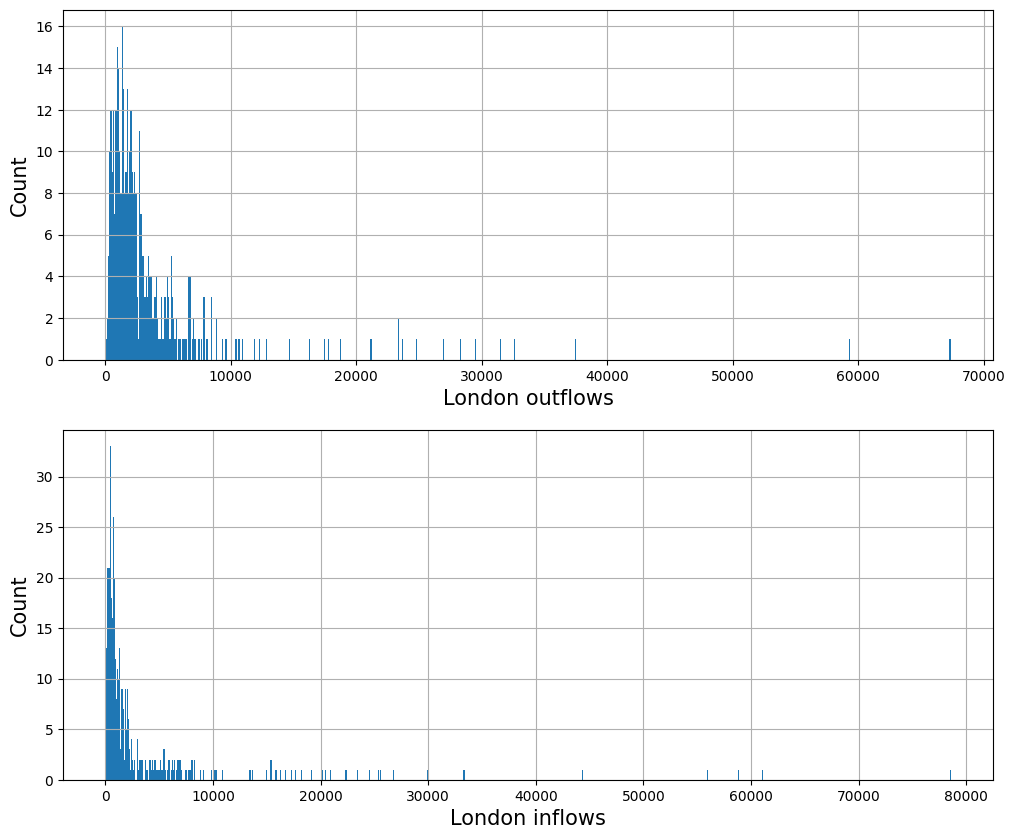

In [197]:
#let's plot this as a histogram
bin_size=100
fig, ax = plt.subplots(2,1,figsize=(12,10))
ax[0].hist(outflows['flows'], bins=int(outflows['flows'].max()/bin_size))
ax[0].set_xlabel('London outflows', fontsize = 15)
ax[0].set_ylabel("Count", fontsize= 15)
ax[0].grid(True)

ax[1].hist(inflows['flows'], bins=int(inflows['flows'].max()/bin_size))
ax[1].set_xlabel('London inflows', fontsize = 15)
ax[1].set_ylabel("Count", fontsize= 15)
ax[1].grid(True)
plt.show()

#### Origin-constrained model

In [198]:
#set up some variables to hold our parameter values in:
alpha = 1
gamma = 1
beta = 2
k = 1
T2 = sum(ldn_tube_2["flows"])

In [200]:
Oi1_alpha = ldn_tube_2["population"]**alpha
Dj2_gamma = ldn_tube_2["jobs"]**gamma
dist_beta = ldn_tube_2["distance"]**-beta
T1 = Oi1_alpha*Dj2_gamma*dist_beta
k = T2/sum(T1)

In [201]:
#run the model and store of the new flow estimates in a new column
ldn_tube_2["newflows"] = round(k*Oi1_alpha*Dj2_gamma*dist_beta, 0)
#convert to integers
ldn_tube_2["newflows"] = ldn_tube_2["newflows"].astype(int)
#check that the sum of these estimates make sense
sum(ldn_tube_2["newflows"])

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

#### Production-constrained model/Origin-constrained model

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import numpy as np
from math import sqrt

In [204]:
#create the formula (the "-1" indicates no intercept in the regression model).
formula = 'flows ~ station_origin + jobs + distance'
#run a production constrained sim
prodSim = smf.glm(formula = formula, data=ldn_tube_2, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61431
Model:                            GLM   Df Residuals:                    61031
Model Family:                 Poisson   Df Model:                          399
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1242e+06
Date:                Sat, 20 Apr 2024   Deviance:                   2.0762e+06
Time:                        17:08:23   Pearson chi2:                 3.07e+06
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [206]:
ldn_tube_2.head()

station_origin station_destination  flows_x  population     jobs  \
0     Abbey Road   Bank and Monument      0.0       599.0  78549.0   
1     Abbey Road             Beckton      1.0       599.0    442.0   
2     Abbey Road           Blackwall      3.0       599.0    665.0   
3     Abbey Road        Canary Wharf      1.0       599.0  58772.0   
4     Abbey Road        Canning Town     37.0       599.0  15428.0   

      distance  newflows  flows_y  
0  8131.525097       NaN    599.0  
1  8510.121774       NaN    599.0  
2  3775.448872       NaN    599.0  
3  5086.514220       NaN    599.0  
4  2228.923167       NaN    599.0

In [208]:
ldn_tube_3 = ldn_tube

In [210]:
ldn_tube_3.head()

station_origin station_destination  flows_x  population     jobs  \
0     Abbey Road   Bank and Monument      0.0       599.0  78549.0   
1     Abbey Road             Beckton      1.0       599.0    442.0   
2     Abbey Road           Blackwall      3.0       599.0    665.0   
3     Abbey Road        Canary Wharf      1.0       599.0  58772.0   
4     Abbey Road        Canning Town     37.0       599.0  15428.0   

      distance  newflows  flows_y  
0  8131.525097       NaN    599.0  
1  8510.121774       NaN    599.0  
2  3775.448872       NaN    599.0  
3  5086.514220       NaN    599.0  
4  2228.923167       NaN    599.0

In [211]:
ldn_underground.head()

station_origin station_destination  flows  population   jobs     distance
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097
1     Abbey Road             Beckton      1         599    442  8510.121774
2     Abbey Road           Blackwall      3         599    665  3775.448872
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220
4     Abbey Road        Canning Town     37         599  15428  2228.923167

In [212]:
## File has been updated to remove zero values from Battersea Park
# Read in the edgelist file from csv
ldn_stations = pd.read_csv("london_flows_updated.csv")

# Print data (first five rows)
ldn_stations.head()

station_origin station_destination  flows  population     jobs     distance
0     Abbey Road   Bank and Monument    0.0       599.0  78549.0  8131.525097
1     Abbey Road             Beckton    1.0       599.0    442.0  8510.121774
2     Abbey Road           Blackwall    3.0       599.0    665.0  3775.448872
3     Abbey Road        Canary Wharf    1.0       599.0  58772.0  5086.514220
4     Abbey Road        Canning Town   37.0       599.0  15428.0  2228.923167

In [214]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(ldn_stations.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"Total":"O_i"}, inplace = True)
ldn_stations = ldn_stations.merge(O_i, on = "station_origin", how = "left" )

KeyError: 'Column not found: flows'

In [215]:

D_j = pd.DataFrame(ldn_stations.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"Total":"D_j"}, inplace = True)
ldn_stations = ldn_stations.merge(D_j, on = "station_destination", how = "left" )

KeyError: 'Column not found: flows'

In [216]:
alpha_i = prodSim.params[0:7]
gamma = prodSim.params[7]
beta = -prodSim.params[8]

/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/851111641.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gamma = prodSim.params[7]
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/851111641.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = -prodSim.params[8]


In [217]:
alpha_i

Intercept                          2.754790
station_origin[T.Acton Central]    1.675314
station_origin[T.Acton Town]       1.510575
station_origin[T.Aldgate]          0.375035
station_origin[T.Aldgate East]     0.450756
station_origin[T.All Saints]      -0.000816
station_origin[T.Alperton]         1.335055
dtype: float64

In [218]:
beta

-1.6293352237282561

In [219]:
gamma

3.2591363240956963

In [220]:
ldn_tube_2["flows"] = np.exp(ldn_tube_2["population"]+gamma*ldn_tube_2["jobs"] 
                                 - beta*ldn_tube_2["distance"])
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
ldn_tube_2.head(10)

/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


station_origin station_destination  flows_x  population     jobs  \
0     Abbey Road   Bank and Monument      0.0       599.0  78549.0   
1     Abbey Road             Beckton      1.0       599.0    442.0   
2     Abbey Road           Blackwall      3.0       599.0    665.0   
3     Abbey Road        Canary Wharf      1.0       599.0  58772.0   
4     Abbey Road        Canning Town     37.0       599.0  15428.0   
5     Abbey Road        Crossharbour      1.0       599.0   1208.0   
6     Abbey Road        Custom House      0.0       599.0    845.0   
7     Abbey Road          Cutty Sark      2.0       599.0   1748.0   
8     Abbey Road              Cyprus      7.0       599.0    850.0   
9     Abbey Road         Devons Road      1.0       599.0    611.0   

      distance  newflows  flows_y  flows  
0  8131.525097       NaN    599.0    inf  
1  8510.121774       NaN    599.0    inf  
2  3775.448872       NaN    599.0    inf  
3  5086.514220       NaN    599.0    inf  
4  2228.923167       NaN    599.0    inf  
5  6686.475560       NaN    599.0    inf  
6  3824.855630       NaN    599.0    inf  
7  8503.898909       NaN    599.0    inf  
8  6532.099618       NaN    599.0    inf  
9  3958.324171       NaN    599.0    inf

In [221]:
#first round the estimates
ldn_tube_2["flows"] = round(ldn_tube_2["flows"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
ldn__tube = ldn_tube_2.pivot_table(values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
ldn__tube

/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/1525206326.py:4: FutureWarning: The provided callable <function sum at 0x11042d9e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ldn__tube = ldn_tube_2.pivot_table(values ="flows", index="station_origin", columns = "station_destination",
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/1525206326.py:4: FutureWarning: The provided callable <function sum at 0x11042d9e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ldn__tube = ldn_tube_2.pivot_table(values ="flows", index="station_origin", columns = "station_destination",
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/1525206326.py:4: FutureWarning: The provided callable <function sum a

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN      inf   
Aldgate                     NaN            NaN         inf      NaN   
Aldgate East                NaN            NaN         inf      inf   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         inf      inf   
Woodgrange Park             NaN            inf         NaN      NaN   
Woodside Park               NaN            NaN         inf      inf   
Woolwich Arsenal            inf            NaN         NaN      NaN   
All                         inf            inf         inf      inf   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                    inf         NaN       inf       inf      NaN   
Aldgate                       inf         NaN       NaN       inf      NaN   
Aldgate East                  NaN         NaN       inf       inf      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                      inf         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park                 inf         NaN       inf       NaN      NaN   
Woolwich Arsenal              NaN         inf       NaN       NaN      NaN   
All                           inf         inf       inf       inf      inf   

station_destination  Angel  ...  Wimbledon  Wimbledon Park  Wood Green  \
station_origin              ...                                          
Abbey Road             NaN  ...        NaN             NaN         NaN   
Acton Central          NaN  ...        NaN             NaN         NaN   
Acton Town             inf  ...        inf             inf         inf   
Aldgate                inf  ...        inf             NaN         inf   
Aldgate East           inf  ...        inf             inf         inf   
...                    ...  ...        ...             ...         ...   
Woodford               inf  ...        inf             NaN         inf   
Woodgrange Park        NaN  ...        NaN             NaN         NaN   
Woodside Park          inf  ...        inf             NaN         inf   
Woolwich Arsenal       NaN  ...        NaN             NaN         NaN   
All                    inf  ...        inf             inf         inf   

station_destination  Wood Lane  Wood Street  Woodford  Woodgrange Park  \
station_origin                                                           
Abbey Road                 NaN          NaN       NaN              NaN   
Acton Central              NaN          NaN       NaN              inf   
Acton Town                 inf          NaN       inf              NaN   
Aldgate                    inf          NaN       inf              NaN   
Aldgate East               inf          NaN       inf              NaN   
...                        ...          ...       ...              ...   
Woodford                   NaN          NaN       NaN              NaN   
Woodgrange Park            NaN          NaN       NaN              NaN   
Woodside Park              NaN          NaN       NaN              NaN   
Woolwich Arsenal           NaN          NaN       NaN              NaN   
All                        inf          inf       inf              inf   

station_destination  Woodside Park  Woolwich Arsenal  All  
station_origin                                             
Abbey Road     

In [222]:
ldn_stations["flows"] = np.exp(ldn_stations["population"]+gamma*ldn_stations["jobs"] 
                                 - beta*ldn_stations["distance"])
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
ldn_stations.head(10)

/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


station_origin station_destination  flows_x  population     jobs  \
0     Abbey Road   Bank and Monument      0.0       599.0  78549.0   
1     Abbey Road             Beckton      1.0       599.0    442.0   
2     Abbey Road           Blackwall      3.0       599.0    665.0   
3     Abbey Road        Canary Wharf      1.0       599.0  58772.0   
4     Abbey Road        Canning Town     37.0       599.0  15428.0   
5     Abbey Road        Crossharbour      1.0       599.0   1208.0   
6     Abbey Road        Custom House      0.0       599.0    845.0   
7     Abbey Road          Cutty Sark      2.0       599.0   1748.0   
8     Abbey Road              Cyprus      7.0       599.0    850.0   
9     Abbey Road         Devons Road      1.0       599.0    611.0   

      distance  flows_y  flows  
0  8131.525097    599.0    inf  
1  8510.121774    599.0    inf  
2  3775.448872    599.0    inf  
3  5086.514220    599.0    inf  
4  2228.923167    599.0    inf  
5  6686.475560    599.0    inf  
6  3824.855630    599.0    inf  
7  8503.898909    599.0    inf  
8  6532.099618    599.0    inf  
9  3958.324171    599.0    inf

In [223]:
#first round the estimates
ldn_tube_2["flows_x"] = round(ldn_tube_2["flows_x"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
ldn__tube = ldn_tube_2.pivot_table(values ="flows_x", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
ldn__tube

/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/926007143.py:4: FutureWarning: The provided callable <function sum at 0x11042d9e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ldn__tube = ldn_tube_2.pivot_table(values ="flows_x", index="station_origin", columns = "station_destination",
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/926007143.py:4: FutureWarning: The provided callable <function sum at 0x11042d9e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ldn__tube = ldn_tube_2.pivot_table(values ="flows_x", index="station_origin", columns = "station_destination",
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/926007143.py:4: FutureWarning: The provided callable <function sum 

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN      3.0   
Aldgate                     NaN            NaN         0.0      NaN   
Aldgate East                NaN            NaN         2.0      0.0   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         2.0      5.0   
Woodgrange Park             NaN            0.0         NaN      NaN   
Woodside Park               NaN            NaN         1.0     26.0   
Woolwich Arsenal           20.0            NaN         NaN      NaN   
All                       345.0          750.0      2202.0   7782.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                   17.0         NaN      35.0       0.0      NaN   
Aldgate                       0.0         NaN       NaN       0.0      NaN   
Aldgate East                  NaN         NaN       0.0       0.0      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                     47.0         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park                11.0         NaN       0.0       NaN      NaN   
Woolwich Arsenal              NaN         7.0       NaN       NaN      NaN   
All                        7932.0       444.0     741.0     256.0    173.0   

station_destination   Angel  ...  Wimbledon  Wimbledon Park  Wood Green  \
station_origin               ...                                          
Abbey Road              NaN  ...        NaN             NaN         NaN   
Acton Central           NaN  ...        NaN             NaN         NaN   
Acton Town             11.0  ...       77.0             3.0         6.0   
Aldgate                17.0  ...        0.0             NaN         4.0   
Aldgate East           20.0  ...       24.0             0.0         0.0   
...                     ...  ...        ...             ...         ...   
Woodford               22.0  ...        2.0             NaN         1.0   
Woodgrange Park         NaN  ...        NaN             NaN         NaN   
Woodside Park          59.0  ...        0.0             NaN         0.0   
Woolwich Arsenal        NaN  ...        NaN             NaN         NaN   
All                  8103.0  ...     6295.0           596.0      2146.0   

station_destination  Wood Lane  Wood Street  Woodford  Woodgrange Park  \
station_origin                                                           
Abbey Road                 NaN          NaN       NaN              NaN   
Acton Central              NaN          NaN       NaN              0.0   
Acton Town                 9.0          NaN       0.0              NaN   
Aldgate                    8.0          NaN       0.0              NaN   
Aldgate East              12.0          NaN       1.0              NaN   
...                        ...          ...       ...              ...   
Woodford                   NaN          NaN       NaN              NaN   
Woodgrange Park            NaN          NaN       NaN              NaN   
Woodside Park              NaN          NaN       NaN              NaN   
Woolwich Arsenal           NaN          NaN       NaN              NaN   
All                     1578.0        404.0     706.0            242.0   

station_destination  Woodside Park  Woolwich Arsenal        All  
station_origin                                          

In [224]:
ldn__tube

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN      3.0   
Aldgate                     NaN            NaN         0.0      NaN   
Aldgate East                NaN            NaN         2.0      0.0   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         2.0      5.0   
Woodgrange Park             NaN            0.0         NaN      NaN   
Woodside Park               NaN            NaN         1.0     26.0   
Woolwich Arsenal           20.0            NaN         NaN      NaN   
All                       345.0          750.0      2202.0   7782.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                   17.0         NaN      35.0       0.0      NaN   
Aldgate                       0.0         NaN       NaN       0.0      NaN   
Aldgate East                  NaN         NaN       0.0       0.0      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                     47.0         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park                11.0         NaN       0.0       NaN      NaN   
Woolwich Arsenal              NaN         7.0       NaN       NaN      NaN   
All                        7932.0       444.0     741.0     256.0    173.0   

station_destination   Angel  ...  Wimbledon  Wimbledon Park  Wood Green  \
station_origin               ...                                          
Abbey Road              NaN  ...        NaN             NaN         NaN   
Acton Central           NaN  ...        NaN             NaN         NaN   
Acton Town             11.0  ...       77.0             3.0         6.0   
Aldgate                17.0  ...        0.0             NaN         4.0   
Aldgate East           20.0  ...       24.0             0.0         0.0   
...                     ...  ...        ...             ...         ...   
Woodford               22.0  ...        2.0             NaN         1.0   
Woodgrange Park         NaN  ...        NaN             NaN         NaN   
Woodside Park          59.0  ...        0.0             NaN         0.0   
Woolwich Arsenal        NaN  ...        NaN             NaN         NaN   
All                  8103.0  ...     6295.0           596.0      2146.0   

station_destination  Wood Lane  Wood Street  Woodford  Woodgrange Park  \
station_origin                                                           
Abbey Road                 NaN          NaN       NaN              NaN   
Acton Central              NaN          NaN       NaN              0.0   
Acton Town                 9.0          NaN       0.0              NaN   
Aldgate                    8.0          NaN       0.0              NaN   
Aldgate East              12.0          NaN       1.0              NaN   
...                        ...          ...       ...              ...   
Woodford                   NaN          NaN       NaN              NaN   
Woodgrange Park            NaN          NaN       NaN              NaN   
Woodside Park              NaN          NaN       NaN              NaN   
Woolwich Arsenal           NaN          NaN       NaN              NaN   
All                     1578.0        404.0     706.0            242.0   

station_destination  Woodside Park  Woolwich Arsenal        All  
station_origin                                          

In [229]:
ldn_tube_4 = ldn_tube_2.replace([np.nan, -np.inf], 0)
print(ldn_tube_4)

         station_origin station_destination  flows_x  population     jobs  \
0            Abbey Road   Bank and Monument      0.0       599.0  78549.0   
1            Abbey Road             Beckton      1.0       599.0    442.0   
2            Abbey Road           Blackwall      3.0       599.0    665.0   
3            Abbey Road        Canary Wharf      1.0       599.0  58772.0   
4            Abbey Road        Canning Town     37.0       599.0  15428.0   
...                 ...                 ...      ...         ...      ...   
61469  Woolwich Arsenal       Tower Gateway    127.0      7892.0   3342.0   
61470  Woolwich Arsenal            West Ham    608.0      7892.0   5487.0   
61471  Woolwich Arsenal     West India Quay      6.0      7892.0    400.0   
61472  Woolwich Arsenal     West Silvertown     81.0      7892.0    893.0   
61473  Woolwich Arsenal           Westferry     76.0      7892.0   1250.0   

           distance  newflows  flows_y  flows  
0       8131.525097       0

In [232]:
ldn_tube_4.head()

station_origin station_destination  flows_x  population     jobs  \
0     Abbey Road   Bank and Monument      0.0       599.0  78549.0   
1     Abbey Road             Beckton      1.0       599.0    442.0   
2     Abbey Road           Blackwall      3.0       599.0    665.0   
3     Abbey Road        Canary Wharf      1.0       599.0  58772.0   
4     Abbey Road        Canning Town     37.0       599.0  15428.0   

      distance  newflows  flows_y  flows  
0  8131.525097       0.0    599.0    inf  
1  8510.121774       0.0    599.0    inf  
2  3775.448872       0.0    599.0    inf  
3  5086.514220       0.0    599.0    inf  
4  2228.923167       0.0    599.0    inf

In [233]:
ldn_tube_4.tail()

station_origin station_destination  flows_x  population    jobs  \
61469  Woolwich Arsenal       Tower Gateway    127.0      7892.0  3342.0   
61470  Woolwich Arsenal            West Ham    608.0      7892.0  5487.0   
61471  Woolwich Arsenal     West India Quay      6.0      7892.0   400.0   
61472  Woolwich Arsenal     West Silvertown     81.0      7892.0   893.0   
61473  Woolwich Arsenal           Westferry     76.0      7892.0  1250.0   

           distance  newflows  flows_y  flows  
61469  13401.795549       0.0   7892.0    inf  
61470   8701.454361       0.0   7892.0    inf  
61471   9536.720451       0.0   7892.0    inf  
61472   5355.248554       0.0   7892.0    inf  
61473   9958.371322       0.0   7892.0    inf

In [234]:
ldn_tube_4 = ldn_tube_4.dropna()
print(ldn_tube_4)

         station_origin station_destination  flows_x  population     jobs  \
0            Abbey Road   Bank and Monument      0.0       599.0  78549.0   
1            Abbey Road             Beckton      1.0       599.0    442.0   
2            Abbey Road           Blackwall      3.0       599.0    665.0   
3            Abbey Road        Canary Wharf      1.0       599.0  58772.0   
4            Abbey Road        Canning Town     37.0       599.0  15428.0   
...                 ...                 ...      ...         ...      ...   
61469  Woolwich Arsenal       Tower Gateway    127.0      7892.0   3342.0   
61470  Woolwich Arsenal            West Ham    608.0      7892.0   5487.0   
61471  Woolwich Arsenal     West India Quay      6.0      7892.0    400.0   
61472  Woolwich Arsenal     West Silvertown     81.0      7892.0    893.0   
61473  Woolwich Arsenal           Westferry     76.0      7892.0   1250.0   

           distance  newflows  flows_y  flows  
0       8131.525097       0

In [225]:
def CalcRSquared(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [235]:
CalcRSquared(ldn_tube_4["flows_x"], ldn_tube_4["distance"])

0.024517893388070006

In [236]:
CalcRSquared(ldn_tube_4["flows_x"], ldn_tube_4["jobs"])

0.07406277611088766

In [237]:
CalcRSquared(ldn_tube_4["flows_x"], ldn_tube_4["population"])

0.04389265726969336

In [238]:
CalcRMSE(ldn_tube_4["flows_x"], ldn_tube_4["distance"])

18818.777

In [240]:
CalcRMSE(ldn_tube_4["flows_x"], ldn_tube_4["jobs"])

12480.434

In [239]:
CalcRMSE(ldn_tube_4["flows_x"], ldn_tube_4["population"])

10113.806

In [252]:
ldn_tube_4["prodsimest1"] = np.exp(ldn_tube_4["population"]+gamma*ldn_tube_4["jobs"] 
                                 - beta*ldn_tube_4["distance"])
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
ldn_tube_4.head(10)

/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


station_origin station_destination  flows_x  population     jobs  \
0     Abbey Road   Bank and Monument      0.0       599.0  78549.0   
1     Abbey Road             Beckton      1.0       599.0    442.0   
2     Abbey Road           Blackwall      3.0       599.0    665.0   
3     Abbey Road        Canary Wharf      1.0       599.0  58772.0   
4     Abbey Road        Canning Town     37.0       599.0  15428.0   
5     Abbey Road        Crossharbour      1.0       599.0   1208.0   
6     Abbey Road        Custom House      0.0       599.0    845.0   
7     Abbey Road          Cutty Sark      2.0       599.0   1748.0   
8     Abbey Road              Cyprus      7.0       599.0    850.0   
9     Abbey Road         Devons Road      1.0       599.0    611.0   

      distance  newflows  flows_y  flows  attrsimFitted  prodsimest1  
0  8131.525097       0.0    599.0    inf          216.0          inf  
1  8510.121774       0.0    599.0    inf            7.0          inf  
2  3775.448872       0.0    599.0    inf           12.0          inf  
3  5086.514220       0.0    599.0    inf          267.0          inf  
4  2228.923167       0.0    599.0    inf          101.0          inf  
5  6686.475560       0.0    599.0    inf           17.0          inf  
6  3824.855630       0.0    599.0    inf           15.0          inf  
7  8503.898909       0.0    599.0    inf           23.0          inf  
8  6532.099618       0.0    599.0    inf           15.0          inf  
9  3958.324171       0.0    599.0    inf           11.0          inf

In [253]:
#first round the estimates
ldn_tube_4["prodsimest1"] = round(ldn_tube_4["prodsimest1"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
ldn__tube_4 = ldn_tube_4.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
ldn__tube_4

/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/2230834238.py:4: FutureWarning: The provided callable <function sum at 0x11042d9e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ldn__tube_4 = ldn_tube_4.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/2230834238.py:4: FutureWarning: The provided callable <function sum at 0x11042d9e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ldn__tube_4 = ldn_tube_4.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/2230834238.py:4: FutureWarning: The provided callable

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN      inf   
Aldgate                     NaN            NaN         inf      NaN   
Aldgate East                NaN            NaN         inf      inf   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         inf      inf   
Woodgrange Park             NaN            inf         NaN      NaN   
Woodside Park               NaN            NaN         inf      inf   
Woolwich Arsenal            inf            NaN         NaN      NaN   
All                         inf            inf         inf      inf   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                    inf         NaN       inf       inf      NaN   
Aldgate                       inf         NaN       NaN       inf      NaN   
Aldgate East                  NaN         NaN       inf       inf      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                      inf         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park                 inf         NaN       inf       NaN      NaN   
Woolwich Arsenal              NaN         inf       NaN       NaN      NaN   
All                           inf         inf       inf       inf      inf   

station_destination  Angel  ...  Wimbledon  Wimbledon Park  Wood Green  \
station_origin              ...                                          
Abbey Road             NaN  ...        NaN             NaN         NaN   
Acton Central          NaN  ...        NaN             NaN         NaN   
Acton Town             inf  ...        inf             inf         inf   
Aldgate                inf  ...        inf             NaN         inf   
Aldgate East           inf  ...        inf             inf         inf   
...                    ...  ...        ...             ...         ...   
Woodford               inf  ...        inf             NaN         inf   
Woodgrange Park        NaN  ...        NaN             NaN         NaN   
Woodside Park          inf  ...        inf             NaN         inf   
Woolwich Arsenal       NaN  ...        NaN             NaN         NaN   
All                    inf  ...        inf             inf         inf   

station_destination  Wood Lane  Wood Street  Woodford  Woodgrange Park  \
station_origin                                                           
Abbey Road                 NaN          NaN       NaN              NaN   
Acton Central              NaN          NaN       NaN              inf   
Acton Town                 inf          NaN       inf              NaN   
Aldgate                    inf          NaN       inf              NaN   
Aldgate East               inf          NaN       inf              NaN   
...                        ...          ...       ...              ...   
Woodford                   NaN          NaN       NaN              NaN   
Woodgrange Park            NaN          NaN       NaN              NaN   
Woodside Park              NaN          NaN       NaN              NaN   
Woolwich Arsenal           NaN          NaN       NaN              NaN   
All                        inf          inf       inf              inf   

station_destination  Woodside Park  Woolwich Arsenal  All  
station_origin                                             
Abbey Road     

In [274]:
ldn_tube_4.head()

station_origin station_destination  flows_x  population     jobs  \
0     Abbey Road   Bank and Monument      0.0       599.0  78549.0   
1     Abbey Road             Beckton      1.0       599.0    442.0   
2     Abbey Road           Blackwall      3.0       599.0    665.0   
3     Abbey Road        Canary Wharf      1.0       599.0  58772.0   
4     Abbey Road        Canning Town     37.0       599.0  15428.0   

      distance  newflows  flows_y  flows  attrsimFitted  prodsimest1  \
0  8131.525097       0.0    599.0    inf          216.0          inf   
1  8510.121774       0.0    599.0    inf            7.0          inf   
2  3775.448872       0.0    599.0    inf           12.0          inf   
3  5086.514220       0.0    599.0    inf          267.0          inf   
4  2228.923167       0.0    599.0    inf          101.0          inf   

   doubsimfitted1  unconstrainedEst1  
0            78.0                0.0  
1             3.0                0.0  
2             4.0                0.0  
3           109.0                0.0  
4            48.0                0.0

In [254]:
CalcRSquared(ldn_tube_4["flows_x"], ldn_tube_4["prodsimest1"])

/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


nan

In [255]:
CalcRMSE(ldn_tube_4["flows_x"], ldn_tube_4["prodsimest1"])

inf

#### Destination-constrained model

In [243]:
#create the formula (the "-1" indicates no intercept in the regression model).
attr_form = 'flows_x ~ station_destination + population + distance'
#run a destination constrained sim
attrSim = smf.glm(formula = attr_form, data=ldn_tube_4, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(attrSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                flows_x   No. Observations:                61474
Model:                            GLM   Df Residuals:                    61073
Model Family:                 Poisson   Df Model:                          400
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2566e+06
Date:                Sat, 20 Apr 2024   Deviance:                   2.3410e+06
Time:                        20:13:09   Pearson chi2:                 3.79e+06
No. Iterations:                    26   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [245]:
#get the predictions
predictions = attrSim.get_prediction(ldn_tube_4[["station_destination", "population", "distance"]])
predictions_summary_frame = predictions.summary_frame()
ldn_tube_4["attrsimFitted"] = round(predictions_summary_frame["mean"],0)
#now we can create pivot table to turn paired list into matrix (and compute the margins as well)
ldn__tube_4 = ldn_tube_4.pivot_table(values ="attrsimFitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
ldn__tube_4

/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/4004427564.py:6: FutureWarning: The provided callable <function sum at 0x11042d9e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ldn__tube_4 = ldn_tube_4.pivot_table(values ="attrsimFitted", index="station_origin", columns = "station_destination",
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/4004427564.py:6: FutureWarning: The provided callable <function sum at 0x11042d9e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ldn__tube_4 = ldn_tube_4.pivot_table(valu

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN     14.0   
Aldgate                     NaN            NaN         6.0      NaN   
Aldgate East                NaN            NaN         6.0     60.0   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         1.0     16.0   
Woodgrange Park             NaN            2.0         NaN      NaN   
Woodside Park               NaN            NaN         2.0     13.0   
Woolwich Arsenal            6.0            NaN         NaN      NaN   
All                       347.0          751.0      2207.0   7781.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                   13.0         NaN      11.0       1.0      NaN   
Aldgate                      57.0         NaN       NaN       0.0      NaN   
Aldgate East                  NaN         NaN       2.0       0.0      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                     17.0         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park                12.0         NaN       1.0       NaN      NaN   
Woolwich Arsenal              NaN         6.0       NaN       NaN      NaN   
All                        7938.0       444.0     741.0     265.0    175.0   

station_destination   Angel  ...  Wimbledon  Wimbledon Park  Wood Green  \
station_origin               ...                                          
Abbey Road              NaN  ...        NaN             NaN         NaN   
Acton Central           NaN  ...        NaN             NaN         NaN   
Acton Town             14.0  ...       29.0             3.0         3.0   
Aldgate                45.0  ...       20.0             NaN         9.0   
Aldgate East           45.0  ...       20.0             2.0         9.0   
...                     ...  ...        ...             ...         ...   
Woodford               12.0  ...        5.0             NaN         4.0   
Woodgrange Park         NaN  ...        NaN             NaN         NaN   
Woodside Park          16.0  ...        8.0             NaN         4.0   
Woolwich Arsenal        NaN  ...        NaN             NaN         NaN   
All                  8101.0  ...     6298.0           601.0      2147.0   

station_destination  Wood Lane  Wood Street  Woodford  Woodgrange Park  \
station_origin                                                           
Abbey Road                 NaN          NaN       NaN              NaN   
Acton Central              NaN          NaN       NaN              2.0   
Acton Town                12.0          NaN       1.0              NaN   
Aldgate                    6.0          NaN       3.0              NaN   
Aldgate East               6.0          NaN       4.0              NaN   
...                        ...          ...       ...              ...   
Woodford                   NaN          NaN       NaN              NaN   
Woodgrange Park            NaN          NaN       NaN              NaN   
Woodside Park              NaN          NaN       NaN              NaN   
Woolwich Arsenal           NaN          NaN       NaN              NaN   
All                     1583.0        402.0     705.0            242.0   

station_destination  Woodside Park  Woolwich Arsenal        All  
station_origin                                          

In [246]:
CalcRSquared(ldn_tube_4["flows_x"], ldn_tube_4["attrsimFitted"])

0.394167094411354

In [248]:
CalcRMSE(ldn_tube_4["flows_x"], ldn_tube_4["attrsimFitted"])

102.289

#### Doubly-constrained model

In [244]:
# Run a doubly constrained SIM with a negative exponential cost function.
doubsim_form = "flows_x ~ station_origin + station_destination + distance"
doubsim1 = smf.glm(formula=doubsim_form, data = ldn_tube_4, family = sm.families.Poisson()).fit()
print(doubsim1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                flows_x   No. Observations:                61474
Model:                            GLM   Df Residuals:                    60676
Model Family:                 Poisson   Df Model:                          797
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.6447e+05
Date:                Sat, 20 Apr 2024   Deviance:                   1.5567e+06
Time:                        20:17:13   Pearson chi2:                 2.05e+06
No. Iterations:                    27   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [256]:
ldn_tube_4["doubsimfitted1"] = np.round(doubsim1.mu,0)

In [258]:
def CalcRSquared(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [264]:
CalcRSqaured(ldn_tube_4["flows_x"],ldn_tube_4["doubsimfitted1"])

NameError: name 'CalcRSqaured' is not defined

In [262]:
CalcRMSE(ldn_tube_4["flows_x"],ldn_tube_4["doubsimfitted1"])

95.196

In [265]:
ldn_tube_4.head()

station_origin station_destination  flows_x  population     jobs  \
0     Abbey Road   Bank and Monument      0.0       599.0  78549.0   
1     Abbey Road             Beckton      1.0       599.0    442.0   
2     Abbey Road           Blackwall      3.0       599.0    665.0   
3     Abbey Road        Canary Wharf      1.0       599.0  58772.0   
4     Abbey Road        Canning Town     37.0       599.0  15428.0   

      distance  newflows  flows_y  flows  attrsimFitted  prodsimest1  \
0  8131.525097       0.0    599.0    inf          216.0          inf   
1  8510.121774       0.0    599.0    inf            7.0          inf   
2  3775.448872       0.0    599.0    inf           12.0          inf   
3  5086.514220       0.0    599.0    inf          267.0          inf   
4  2228.923167       0.0    599.0    inf          101.0          inf   

   doubsimfitted1  
0            78.0  
1             3.0  
2             4.0  
3           109.0  
4            48.0

#### Unconstrained model

In [267]:
#set up some variables to hold our parameter values in:
alpha = 1
gamma = 1
beta = 2
k = 1
T2 = sum(ldn_tube_4["flows_x"])

In [268]:
Oi1_alpha = ldn_tube_4["population"]**alpha
Dj2_gamma = ldn_tube_4["jobs"]**gamma
dist_beta = ldn_tube_4["distance"]**-beta
T1 = Oi1_alpha*Dj2_gamma*dist_beta
k = T2/sum(T1)

In [269]:
#run the model and store of the new flow estimates in a new column
ldn_tube_4["unconstrainedEst1"] = round(k*Oi1_alpha*Dj2_gamma*dist_beta, 0)
#convert to integers
ldn_tube_4["unconstrainedEst1"] = ldn_tube_4["unconstrainedEst1"].astype(int)
#check that the sum of these estimates make sense
sum(ldn_tube_4["unconstrainedEst1"])

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [270]:
ldn_tube_4.head()

station_origin station_destination  flows_x  population     jobs  \
0     Abbey Road   Bank and Monument      0.0       599.0  78549.0   
1     Abbey Road             Beckton      1.0       599.0    442.0   
2     Abbey Road           Blackwall      3.0       599.0    665.0   
3     Abbey Road        Canary Wharf      1.0       599.0  58772.0   
4     Abbey Road        Canning Town     37.0       599.0  15428.0   

      distance  newflows  flows_y  flows  attrsimFitted  prodsimest1  \
0  8131.525097       0.0    599.0    inf          216.0          inf   
1  8510.121774       0.0    599.0    inf            7.0          inf   
2  3775.448872       0.0    599.0    inf           12.0          inf   
3  5086.514220       0.0    599.0    inf          267.0          inf   
4  2228.923167       0.0    599.0    inf          101.0          inf   

   doubsimfitted1  unconstrainedEst1  
0            78.0                0.0  
1             3.0                0.0  
2             4.0                0.0  
3           109.0                0.0  
4            48.0                0.0

In [271]:
ldn_tube_4.tail()

station_origin station_destination  flows_x  population    jobs  \
61469  Woolwich Arsenal       Tower Gateway    127.0      7892.0  3342.0   
61470  Woolwich Arsenal            West Ham    608.0      7892.0  5487.0   
61471  Woolwich Arsenal     West India Quay      6.0      7892.0   400.0   
61472  Woolwich Arsenal     West Silvertown     81.0      7892.0   893.0   
61473  Woolwich Arsenal           Westferry     76.0      7892.0  1250.0   

           distance  newflows  flows_y  flows  attrsimFitted  prodsimest1  \
61469  13401.795549       0.0   7892.0    inf           39.0          inf   
61470   8701.454361       0.0   7892.0    inf           26.0          inf   
61471   9536.720451       0.0   7892.0    inf            6.0          inf   
61472   5355.248554       0.0   7892.0    inf           21.0          inf   
61473   9958.371322       0.0   7892.0    inf           16.0          inf   

       doubsimfitted1  unconstrainedEst1  
61469           189.0                0.0  
61470           177.0                0.0  
61471            27.0                0.0  
61472           132.0                0.0  
61473            81.0                0.0

In [272]:
CalcRSqaured(ldn_tube_4["flows_x"],ldn_tube_4["unconstrainedEst1"])

NameError: name 'CalcRSqaured' is not defined

In [273]:
CalcRMSE(ldn_tube_4["flows_x"],ldn_tube_4["unconstrainedEst1"])

133.809

In [276]:
CalcRSquared(ldn_tube_4["flows_x"], ldn_tube_4["doubsimfitted1"])

0.47663287125851955

In [277]:
CalcRSquared(ldn_tube_4["flows_x"], ldn_tube_4["unconstrainedEst1"])

ValueError: array must not contain infs or NaNs

In [279]:
ldn_tube_4 = ldn_tube_4.dropna()
print(ldn_tube_4)

         station_origin station_destination  flows_x  population     jobs  \
0            Abbey Road   Bank and Monument      0.0       599.0  78549.0   
1            Abbey Road             Beckton      1.0       599.0    442.0   
2            Abbey Road           Blackwall      3.0       599.0    665.0   
3            Abbey Road        Canary Wharf      1.0       599.0  58772.0   
4            Abbey Road        Canning Town     37.0       599.0  15428.0   
...                 ...                 ...      ...         ...      ...   
61469  Woolwich Arsenal       Tower Gateway    127.0      7892.0   3342.0   
61470  Woolwich Arsenal            West Ham    608.0      7892.0   5487.0   
61471  Woolwich Arsenal     West India Quay      6.0      7892.0    400.0   
61472  Woolwich Arsenal     West Silvertown     81.0      7892.0    893.0   
61473  Woolwich Arsenal           Westferry     76.0      7892.0   1250.0   

           distance  newflows  flows_y  flows  attrsimFitted  prodsimest1  

In [280]:
CalcRSquared(ldn_tube_4["flows_x"], ldn_tube_4["unconstrainedEst1"])

/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


nan

### 4.0 Scenarios
This section will consider the flows - see guidance from moodle
* **Scenario A:** assume that Canary Wharf has a 50% decrease in jobs after Brexit. Using the calibrated parameter β (beta), compute the new flows for scenario A. Make sure the no. of commuters is conserved and explain how you ensured this.
* **Scenario B:** assume that there is a signtificant increase in the cost of transport. Select 2 values for the parameter in the cost function reflecting scenario B. Recompute the distribution of flows.
* **Part 3:** Discuss how the flows change for the 3 different situations: scenario A, and scenario B with 2 selections of parameters. Which scenario would have more impact in the redistribution of flows? Explain and justify your answers using th results of the analysis.

In [285]:
#Scenario A
def jobs_dcr(row):
    if row["station_destination"]== "Canary Wharf":
        val = 58772/2
    else:
        val = row["jobs"]
    return val
        
ldn_tube_4["scenario_A"] = ldn_tube_4.apply(jobs_dcr, axis =1)
ldn_tube_4.head(10)

/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/3386260870.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldn_tube_4["scenario_A"] = ldn_tube_4.apply(jobs_dcr, axis =1)


station_origin station_destination  flows_x  population     jobs  \
0     Abbey Road   Bank and Monument      0.0       599.0  78549.0   
1     Abbey Road             Beckton      1.0       599.0    442.0   
2     Abbey Road           Blackwall      3.0       599.0    665.0   
3     Abbey Road        Canary Wharf      1.0       599.0  58772.0   
4     Abbey Road        Canning Town     37.0       599.0  15428.0   
5     Abbey Road        Crossharbour      1.0       599.0   1208.0   
6     Abbey Road        Custom House      0.0       599.0    845.0   
7     Abbey Road          Cutty Sark      2.0       599.0   1748.0   
8     Abbey Road              Cyprus      7.0       599.0    850.0   
9     Abbey Road         Devons Road      1.0       599.0    611.0   

      distance  newflows  flows_y  flows  attrsimFitted  prodsimest1  \
0  8131.525097       0.0    599.0    inf          216.0          inf   
1  8510.121774       0.0    599.0    inf            7.0          inf   
2  3775.448872       0.0    599.0    inf           12.0          inf   
3  5086.514220       0.0    599.0    inf          267.0          inf   
4  2228.923167       0.0    599.0    inf          101.0          inf   
5  6686.475560       0.0    599.0    inf           17.0          inf   
6  3824.855630       0.0    599.0    inf           15.0          inf   
7  8503.898909       0.0    599.0    inf           23.0          inf   
8  6532.099618       0.0    599.0    inf           15.0          inf   
9  3958.324171       0.0    599.0    inf           11.0          inf   

   doubsimfitted1  unconstrainedEst1  scenario_A  
0            78.0                0.0     78549.0  
1             3.0                0.0       442.0  
2             4.0                0.0       665.0  
3           109.0                0.0     29386.0  
4            48.0                0.0     15428.0  
5             5.0                0.0      1208.0  
6             5.0                0.0       845.0  
7             6.0                0.0      1748.0  
8             5.0                0.0       850.0  
9             4.0                0.0       611.0

In [286]:
ldn_tube_4["doubsimfitted1"] = np.exp(ldn_tube_4["population"]+gamma*np.log(ldn_tube_4["scenario_A"]) - beta*ldn_tube_4["distance"])

ldn_tube_4["doubsimfitted1"] = round(ldn_tube_4["doubsimfitted1"],0)
#now we can convert the pivot table into a matrix
ldn__tube_4 = ldn_tube_4.pivot_table(values ="doubsimfitted1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
ldn__tube_4

/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/2797712572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldn_tube_4["doubsimfitted1"] = np.exp(ldn_tube_4["population"]+gamma*np.log(ldn_tube_4["scenario_A"]) - beta*ldn_tube_4["distance"])
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56

station_destination  Abbey Road  Acton Central  Acton Town        Aldgate  \
station_origin                                                              
Abbey Road                  NaN            NaN         NaN            NaN   
Acton Central               NaN            NaN         NaN            NaN   
Acton Town                  NaN            NaN         NaN   0.000000e+00   
Aldgate                     NaN            NaN         0.0            NaN   
Aldgate East                NaN            NaN         0.0  6.515528e+133   
...                         ...            ...         ...            ...   
Woodford                    NaN            NaN         0.0   0.000000e+00   
Woodgrange Park             NaN            0.0         NaN            NaN   
Woodside Park               NaN            NaN         0.0   0.000000e+00   
Woolwich Arsenal            0.0            NaN         NaN            NaN   
All                         inf            inf         inf            inf   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town           0.000000e+00         NaN       0.0       0.0      NaN   
Aldgate              4.111680e+09         NaN       NaN       0.0      NaN   
Aldgate East                  NaN         NaN       0.0       0.0      NaN   
...                           ...         ...       ...       ...      ...   
Woodford             0.000000e+00         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park        0.000000e+00         NaN       0.0       NaN      NaN   
Woolwich Arsenal              NaN         0.0       NaN       NaN      NaN   
All                           inf         inf       inf       0.0      inf   

station_destination  Angel  ...  Wimbledon  Wimbledon Park  Wood Green  \
station_origin              ...                                          
Abbey Road             NaN  ...        NaN             NaN         NaN   
Acton Central          NaN  ...        NaN             NaN         NaN   
Acton Town             0.0  ...        0.0             0.0         0.0   
Aldgate                0.0  ...        0.0             NaN         0.0   
Aldgate East           0.0  ...        0.0             0.0         0.0   
...                    ...  ...        ...             ...         ...   
Woodford               0.0  ...        0.0             NaN         0.0   
Woodgrange Park        NaN  ...        NaN             NaN         NaN   
Woodside Park          0.0  ...        0.0             NaN         0.0   
Woolwich Arsenal       NaN  ...        NaN             NaN         NaN   
All                    inf  ...        inf             inf         inf   

station_destination  Wood Lane  Wood Street  Woodford  Woodgrange Park  \
station_origin                                                           
Abbey Road                 NaN          NaN       NaN              NaN   
Acton Central              NaN          NaN       NaN              0.0   
Acton Town                 0.0          NaN       0.0              NaN   
Aldgate                    0.0          NaN       0.0              NaN   
Aldgate East               0.0          NaN       0.0              NaN   
...                        ...          ...       ...              ...   
Woodford                   NaN          NaN       NaN              NaN   
Woodgrange Park            NaN          NaN       NaN              NaN   
Woodside Park              NaN          NaN       NaN              NaN   
Woolwich Arsenal           NaN          NaN       NaN              NaN   
All                        inf          inf       inf              inf   

station_destination  Woodside Park  Woolwich Arsenal  All

In [287]:
ldn_tube_4.head()

station_origin station_destination  flows_x  population     jobs  \
0     Abbey Road   Bank and Monument      0.0       599.0  78549.0   
1     Abbey Road             Beckton      1.0       599.0    442.0   
2     Abbey Road           Blackwall      3.0       599.0    665.0   
3     Abbey Road        Canary Wharf      1.0       599.0  58772.0   
4     Abbey Road        Canning Town     37.0       599.0  15428.0   

      distance  newflows  flows_y  flows  attrsimFitted  prodsimest1  \
0  8131.525097       0.0    599.0    inf          216.0          inf   
1  8510.121774       0.0    599.0    inf            7.0          inf   
2  3775.448872       0.0    599.0    inf           12.0          inf   
3  5086.514220       0.0    599.0    inf          267.0          inf   
4  2228.923167       0.0    599.0    inf          101.0          inf   

   doubsimfitted1  unconstrainedEst1  scenario_A  
0             0.0                0.0     78549.0  
1             0.0                0.0       442.0  
2             0.0                0.0       665.0  
3             0.0                0.0     29386.0  
4             0.0                0.0     15428.0

In [288]:
CalcRSquared(ldn_tube_4["scenario_A"], ldn_tube_4["doubsimfitted1"])

/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4832: RuntimeWarning: invalid value encountered in subtract
  ym = y.astype(dtype) - ymean


ValueError: array must not contain infs or NaNs

In [289]:
CalcRMSE(ldn_tube_4["scenario_A"],ldn_tube_4["doubsimfitted1"])

inf

In [291]:
CalcRMSE(ldn_tube_4["flows_x"],ldn_tube_4["scenario_A"])

11952.642

In [292]:
CalcRSquared(ldn_tube_4["flows_x"], ldn_tube_4["scenario_A"])

0.07184229101709523

In [311]:
#assume cost of tranport has increased, increase beta value:
alpha = 1
gamma = 1
beta = 4
k = 1
T2 = sum(ldn_tube_4["flows_x"])

In [312]:
Oi1_alpha = ldn_tube_4["population"]**alpha
Dj2_gamma = ldn_tube_4["jobs"]**gamma
dist_beta = ldn_tube_4["distance"]**-beta
T1 = Oi1_alpha*Dj2_gamma*dist_beta
k = T2/sum(T1)

In [313]:
#run the model and store of the new flow estimates in a new column
ldn_tube_4["beta_4"] = round(k*Oi1_alpha*Dj2_gamma*dist_beta, 0)
#convert to integers
ldn_tube_4["beta_4"] = ldn_tube_4["beta_4"].astype(int)
#check that the sum of these estimates make sense
sum(ldn_tube_4["beta_4"])

/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/2553337753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldn_tube_4["beta_4"] = round(k*Oi1_alpha*Dj2_gamma*dist_beta, 0)
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/2553337753.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldn_tube_4["beta_4"] = ldn_tube_4["beta_4"].astype(int)


1541306

In [314]:
ldn_tube_4.head()

station_origin station_destination  flows_x  population     jobs  \
0     Abbey Road   Bank and Monument      0.0       599.0  78549.0   
1     Abbey Road             Beckton      1.0       599.0    442.0   
2     Abbey Road           Blackwall      3.0       599.0    665.0   
3     Abbey Road        Canary Wharf      1.0       599.0  58772.0   
4     Abbey Road        Canning Town     37.0       599.0  15428.0   

      distance  newflows  flows_y  flows  attrsimFitted  prodsimest1  \
0  8131.525097       0.0    599.0    inf          216.0          inf   
1  8510.121774       0.0    599.0    inf            7.0          inf   
2  3775.448872       0.0    599.0    inf           12.0          inf   
3  5086.514220       0.0    599.0    inf          267.0          inf   
4  2228.923167       0.0    599.0    inf          101.0          inf   

   doubsimfitted1  unconstrainedEst1  scenario_A  beta_4  doubsimfitted2  \
0             0.0                0.0     78549.0       0             0.0   
1             0.0                0.0       442.0       0             0.0   
2             0.0                0.0       665.0       0             0.0   
3             0.0                0.0     29386.0       0             0.0   
4             0.0                0.0     15428.0       3             0.0   

   doubsimfitted3  
0             inf  
1             inf  
2             inf  
3             inf  
4             inf

In [315]:
ldn_tube_4["doubsimfitted2"] = np.exp(ldn_tube_4["population"]+gamma*np.log(ldn_tube_4["jobs"]) - beta*ldn_tube_4["distance"])

ldn_tube_4["doubsimfitted2"] = round(ldn_tube_4["doubsimfitted2"],0)
#now we can convert the pivot table into a matrix
ldn__tube_4 = ldn_tube_4.pivot_table(values ="doubsimfitted2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
ldn__tube_4

/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/2550269371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldn_tube_4["doubsimfitted2"] = np.exp(ldn_tube_4["population"]+gamma*np.log(ldn_tube_4["jobs"]) - beta*ldn_tube_4["distance"])
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/25

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN      0.0   
Aldgate                     NaN            NaN         0.0      NaN   
Aldgate East                NaN            NaN         0.0      0.0   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         0.0      0.0   
Woodgrange Park             NaN            0.0         NaN      NaN   
Woodside Park               NaN            NaN         0.0      0.0   
Woolwich Arsenal            0.0            NaN         NaN      NaN   
All                         inf            0.0         inf      inf   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                    0.0         NaN       0.0       0.0      NaN   
Aldgate                       0.0         NaN       NaN       0.0      NaN   
Aldgate East                  NaN         NaN       0.0       0.0      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                      0.0         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park                 0.0         NaN       0.0       NaN      NaN   
Woolwich Arsenal              NaN         0.0       NaN       NaN      NaN   
All                           inf         inf       0.0       0.0      0.0   

station_destination  Angel  ...  Wimbledon  Wimbledon Park  Wood Green  \
station_origin              ...                                          
Abbey Road             NaN  ...        NaN             NaN         NaN   
Acton Central          NaN  ...        NaN             NaN         NaN   
Acton Town             0.0  ...        0.0    0.000000e+00         0.0   
Aldgate                0.0  ...        0.0             NaN         0.0   
Aldgate East           0.0  ...        0.0    0.000000e+00         0.0   
...                    ...  ...        ...             ...         ...   
Woodford               0.0  ...        0.0             NaN         0.0   
Woodgrange Park        NaN  ...        NaN             NaN         NaN   
Woodside Park          0.0  ...        0.0             NaN         0.0   
Woolwich Arsenal       NaN  ...        NaN             NaN         NaN   
All                    inf  ...        inf   8.431030e+197         inf   

station_destination  Wood Lane  Wood Street  Woodford  Woodgrange Park  \
station_origin                                                           
Abbey Road                 NaN          NaN       NaN              NaN   
Acton Central              NaN          NaN       NaN              0.0   
Acton Town                 0.0          NaN       0.0              NaN   
Aldgate                    0.0          NaN       0.0              NaN   
Aldgate East               0.0          NaN       0.0              NaN   
...                        ...          ...       ...              ...   
Woodford                   NaN          NaN       NaN              NaN   
Woodgrange Park            NaN          NaN       NaN              NaN   
Woodside Park              NaN          NaN       NaN              NaN   
Woolwich Arsenal           NaN          NaN       NaN              NaN   
All                        inf          inf       inf              0.0   

station_destination  Woodside Park  Woolwich Arsenal            All  
station_origin                                                   

In [316]:
ldn_tube_4.head()

station_origin station_destination  flows_x  population     jobs  \
0     Abbey Road   Bank and Monument      0.0       599.0  78549.0   
1     Abbey Road             Beckton      1.0       599.0    442.0   
2     Abbey Road           Blackwall      3.0       599.0    665.0   
3     Abbey Road        Canary Wharf      1.0       599.0  58772.0   
4     Abbey Road        Canning Town     37.0       599.0  15428.0   

      distance  newflows  flows_y  flows  attrsimFitted  prodsimest1  \
0  8131.525097       0.0    599.0    inf          216.0          inf   
1  8510.121774       0.0    599.0    inf            7.0          inf   
2  3775.448872       0.0    599.0    inf           12.0          inf   
3  5086.514220       0.0    599.0    inf          267.0          inf   
4  2228.923167       0.0    599.0    inf          101.0          inf   

   doubsimfitted1  unconstrainedEst1  scenario_A  beta_4  doubsimfitted2  \
0             0.0                0.0     78549.0       0             0.0   
1             0.0                0.0       442.0       0             0.0   
2             0.0                0.0       665.0       0             0.0   
3             0.0                0.0     29386.0       0             0.0   
4             0.0                0.0     15428.0       3             0.0   

   doubsimfitted3  
0             inf  
1             inf  
2             inf  
3             inf  
4             inf

In [317]:
CalcRMSE(ldn_tube_4["flows_x"],ldn_tube_4["doubsimfitted2"])

inf

In [318]:
alpha_i = doubsim1.params[0:7]
gamma = doubsim1.params[7]
beta = -doubsim1.params[8]

/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/3554750261.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gamma = doubsim1.params[7]
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/3554750261.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = -doubsim1.params[8]


In [319]:
alpha_i

Intercept                          1.357250
station_origin[T.Acton Central]    1.602241
station_origin[T.Acton Town]       1.413184
station_origin[T.Aldgate]          0.183918
station_origin[T.Aldgate East]     0.271950
station_origin[T.All Saints]      -0.066771
station_origin[T.Alperton]         1.338009
dtype: float64

In [320]:
beta

-1.7321714323371005

In [321]:
gamma

3.8019281377181624

In [325]:
# Run a doubly constrained SIM with a negative exponential cost function.
doubsim_form = "flows_x ~ station_origin + station_destination + distance"
doubsim2 = smf.glm(formula=doubsim_form, data = ldn_tube_4, family = sm.families.Poisson()).fit()
print(doubsim2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                flows_x   No. Observations:                61456
Model:                            GLM   Df Residuals:                    60658
Model Family:                 Poisson   Df Model:                          797
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.5105e+05
Date:                Sat, 20 Apr 2024   Deviance:                   1.5299e+06
Time:                        22:36:51   Pearson chi2:                 2.02e+06
No. Iterations:                    27   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [326]:
alpha_i = doubsim2.params[0:7]
gamma = doubsim2.params[7]
beta = -doubsim2.params[8]

/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/2833765516.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gamma = doubsim2.params[7]
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/2833765516.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = -doubsim2.params[8]


In [332]:
ldn_tube_4["doubsimfitted4"] = np.exp(ldn_tube_4["population"]+gamma*np.log(ldn_tube_4["jobs"]) - beta*ldn_tube_4["distance"])

ldn_tube_4["doubsimfitted4"] = round(ldn_tube_4["doubsimfitted4"],0)
#now we can convert the pivot table into a matrix
ldn__tube_4 = ldn_tube_4.pivot_table(values ="doubsimfitted4", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
ldn__tube_4

/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mariabazic/opt/anaconda3/envs/CASA-UrbanSimulation/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/1775461588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldn_tube_4["doubsimfitted4"] = np.exp(ldn_tube_4["population"]+gamma*np.log(ldn_tube_4["jobs"]) - beta*ldn_tube_4["distance"])
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/17

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN      inf   
Aldgate                     NaN            NaN         inf      NaN   
Aldgate East                NaN            NaN         inf      inf   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         inf      inf   
Woodgrange Park             NaN            inf         NaN      NaN   
Woodside Park               NaN            NaN         inf      inf   
Woolwich Arsenal            inf            NaN         NaN      NaN   
All                         inf            inf         inf      inf   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                    inf         NaN       inf       inf      NaN   
Aldgate                       inf         NaN       NaN       inf      NaN   
Aldgate East                  NaN         NaN       inf       inf      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                      inf         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park                 inf         NaN       inf       NaN      NaN   
Woolwich Arsenal              NaN         inf       NaN       NaN      NaN   
All                           inf         inf       inf       inf      inf   

station_destination  Angel  ...  Wimbledon  Wimbledon Park  Wood Green  \
station_origin              ...                                          
Abbey Road             NaN  ...        NaN             NaN         NaN   
Acton Central          NaN  ...        NaN             NaN         NaN   
Acton Town             inf  ...        inf             inf         inf   
Aldgate                inf  ...        inf             NaN         inf   
Aldgate East           inf  ...        inf             inf         inf   
...                    ...  ...        ...             ...         ...   
Woodford               inf  ...        inf             NaN         inf   
Woodgrange Park        NaN  ...        NaN             NaN         NaN   
Woodside Park          inf  ...        inf             NaN         inf   
Woolwich Arsenal       NaN  ...        NaN             NaN         NaN   
All                    inf  ...        inf             inf         inf   

station_destination  Wood Lane  Wood Street  Woodford  Woodgrange Park  \
station_origin                                                           
Abbey Road                 NaN          NaN       NaN              NaN   
Acton Central              NaN          NaN       NaN              inf   
Acton Town                 inf          NaN       inf              NaN   
Aldgate                    inf          NaN       inf              NaN   
Aldgate East               inf          NaN       inf              NaN   
...                        ...          ...       ...              ...   
Woodford                   NaN          NaN       NaN              NaN   
Woodgrange Park            NaN          NaN       NaN              NaN   
Woodside Park              NaN          NaN       NaN              NaN   
Woolwich Arsenal           NaN          NaN       NaN              NaN   
All                        inf          inf       inf              inf   

station_destination  Woodside Park  Woolwich Arsenal  All  
station_origin                                             
Abbey Road     

In [333]:
ldn_tube_4.head()

station_origin station_destination  flows_x  population     jobs  \
0     Abbey Road   Bank and Monument      0.0       599.0  78549.0   
1     Abbey Road             Beckton      1.0       599.0    442.0   
2     Abbey Road           Blackwall      3.0       599.0    665.0   
3     Abbey Road        Canary Wharf      1.0       599.0  58772.0   
4     Abbey Road        Canning Town     37.0       599.0  15428.0   

      distance  newflows  flows_y  flows  attrsimFitted  prodsimest1  \
0  8131.525097       0.0    599.0    inf          216.0          inf   
1  8510.121774       0.0    599.0    inf            7.0          inf   
2  3775.448872       0.0    599.0    inf           12.0          inf   
3  5086.514220       0.0    599.0    inf          267.0          inf   
4  2228.923167       0.0    599.0    inf          101.0          inf   

   doubsimfitted1  unconstrainedEst1  scenario_A  beta_4  doubsimfitted2  \
0             0.0                0.0     78549.0       0             0.0   
1             0.0                0.0       442.0       0             0.0   
2             0.0                0.0       665.0       0             0.0   
3             0.0                0.0     29386.0       0             0.0   
4             0.0                0.0     15428.0       3             0.0   

   doubsimfitted3  doubsimfitted4  
0             inf             inf  
1             inf             inf  
2             inf             inf  
3             inf             inf  
4             inf             inf

In [335]:
CalcRMSE(ldn_tube_4["flows_x"],ldn_tube_4["beta_4"])

1381.198

In [336]:
CalcRSquared(ldn_tube_4["flows_x"], ldn_tube_4["beta_4"])

0.0006193184043781382

In [337]:
#assume cost of tranport has increased, increase beta value:
alpha = 1
gamma = 1
beta = 6
k = 1
T2 = sum(ldn_tube_4["flows_x"])

In [338]:
Oi1_alpha = ldn_tube_4["population"]**alpha
Dj2_gamma = ldn_tube_4["jobs"]**gamma
dist_beta = ldn_tube_4["distance"]**-beta
T1 = Oi1_alpha*Dj2_gamma*dist_beta
k = T2/sum(T1)

In [339]:
#run the model and store of the new flow estimates in a new column
ldn_tube_4["beta_6"] = round(k*Oi1_alpha*Dj2_gamma*dist_beta, 0)
#convert to integers
ldn_tube_4["beta_6"] = ldn_tube_4["beta_6"].astype(int)
#check that the sum of these estimates make sense
sum(ldn_tube_4["beta_6"])

/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/3582076335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldn_tube_4["beta_6"] = round(k*Oi1_alpha*Dj2_gamma*dist_beta, 0)
/var/folders/b7/1n8xwqp50413mrh_tzvt1zqm0000gn/T/ipykernel_56020/3582076335.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldn_tube_4["beta_6"] = ldn_tube_4["beta_6"].astype(int)


1542096

In [340]:
ldn_tube_4.head()

station_origin station_destination  flows_x  population     jobs  \
0     Abbey Road   Bank and Monument      0.0       599.0  78549.0   
1     Abbey Road             Beckton      1.0       599.0    442.0   
2     Abbey Road           Blackwall      3.0       599.0    665.0   
3     Abbey Road        Canary Wharf      1.0       599.0  58772.0   
4     Abbey Road        Canning Town     37.0       599.0  15428.0   

      distance  newflows  flows_y  flows  attrsimFitted  prodsimest1  \
0  8131.525097       0.0    599.0    inf          216.0          inf   
1  8510.121774       0.0    599.0    inf            7.0          inf   
2  3775.448872       0.0    599.0    inf           12.0          inf   
3  5086.514220       0.0    599.0    inf          267.0          inf   
4  2228.923167       0.0    599.0    inf          101.0          inf   

   doubsimfitted1  unconstrainedEst1  scenario_A  beta_4  doubsimfitted2  \
0             0.0                0.0     78549.0       0             0.0   
1             0.0                0.0       442.0       0             0.0   
2             0.0                0.0       665.0       0             0.0   
3             0.0                0.0     29386.0       0             0.0   
4             0.0                0.0     15428.0       3             0.0   

   doubsimfitted3  doubsimfitted4  beta_6  
0             inf             inf       0  
1             inf             inf       0  
2             inf             inf       0  
3             inf             inf       0  
4             inf             inf       0

In [341]:
CalcRMSE(ldn_tube_4["flows_x"],ldn_tube_4["beta_6"])

2054.166

In [342]:
CalcRSquared(ldn_tube_4["flows_x"], ldn_tube_4["beta_6"])

4.0169690889750535e-05